# ISP Lab07
## Phan Hồng Trâm_21110414

In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray

C:\Users\PC\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


# Hàm show ảnh

In [2]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):
    from matplotlib import pyplot as plt
    import matplotlib.gridspec as gridspec

    gs = gridspec.GridSpec(nRows, nCols)
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,10))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')

        plt.subplot(nRows, nCols,i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.title("Image " + str(i))
        plt.axis('off')

    plt.show()

# Lấy thông tin ảnh

In [3]:
def InfoImage(IM):
    Image = IM
    Width = Image.shape[1]
    Height = Image.shape[0]
    Channel = len(Image.shape)
    print("Width : ", Width, " Height : ", Height, " Channel : ", Channel)

    if(Channel == 2):
        print("Min Intensity: ", IM.min(), " Max Intensity: ", IM.max())
    else:
        print("Red - Min Intensity: ", IM[:,:,0].min(), " Max Intensity: ", IM[:,:,0].max())
        print("Green - Min Intensity: ", IM[:,:,1].min(), " Max Intensity: ", IM[:,:,1].max())
        print("Blue - Min Intensity: ", IM[:,:,2].min(), " Max Intensity: ", IM[:,:,2].max())

# Resize ảnh

In [4]:
def ResizeImage(IM, DesiredWidth, DesiredHeight):
    from skimage.transform import rescale, resize

    OrigWidth = float(IM.shape[1])
    OrigHeight = float(IM.shape[0])
    Width = DesiredWidth
    Height = DesiredHeight

    if((Width == 0) & (Height == 0)):
        return IM

    if(Width == 0):
        Width = int((OrigWidth * Height)/OrigHeight)

    if(Height == 0):
        Height = int((OrigHeight * Width)/OrigWidth)

    dim = (Width, Height)
    resizedIM = cv2.resize(IM, dim, interpolation = cv2.INTER_NEAREST)
    return resizedIM

# 1/ Với mỗi các phương pháp Morphology sau kiếm 1 ảnh từ internet làm ví dụ thể hiện rõ kết quả nhất :
- Dilation
- Erosion
- Closing
- Opening
- Gradient

## Dilation

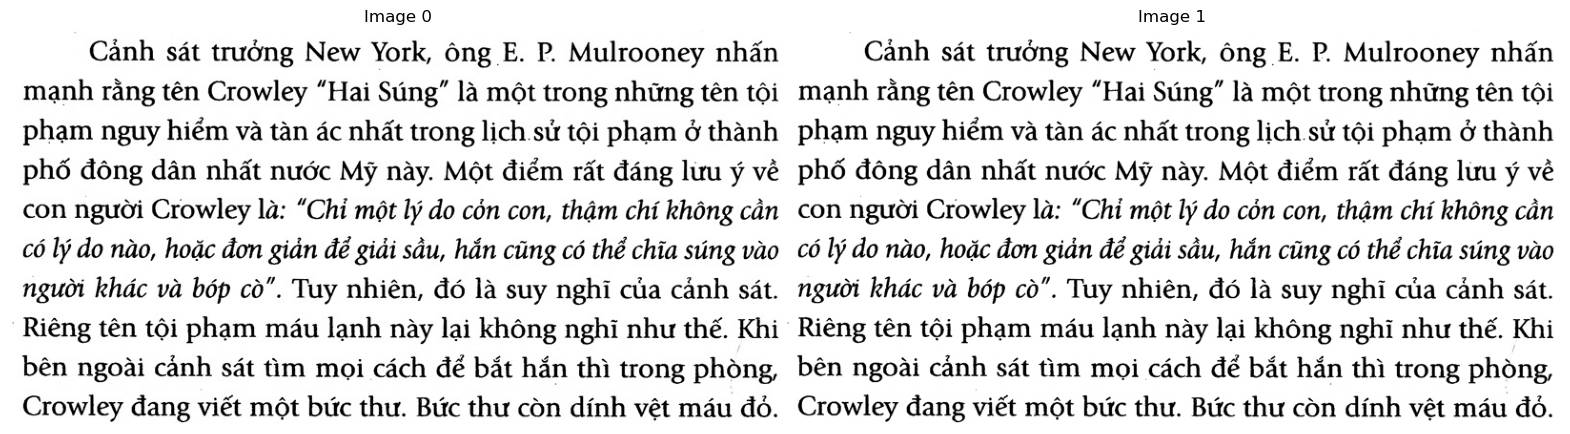

In [5]:
image_1 = imread('Newspaper.jpg')
image_gray_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
ShowImage([image_1,image_gray_1], 1,2)

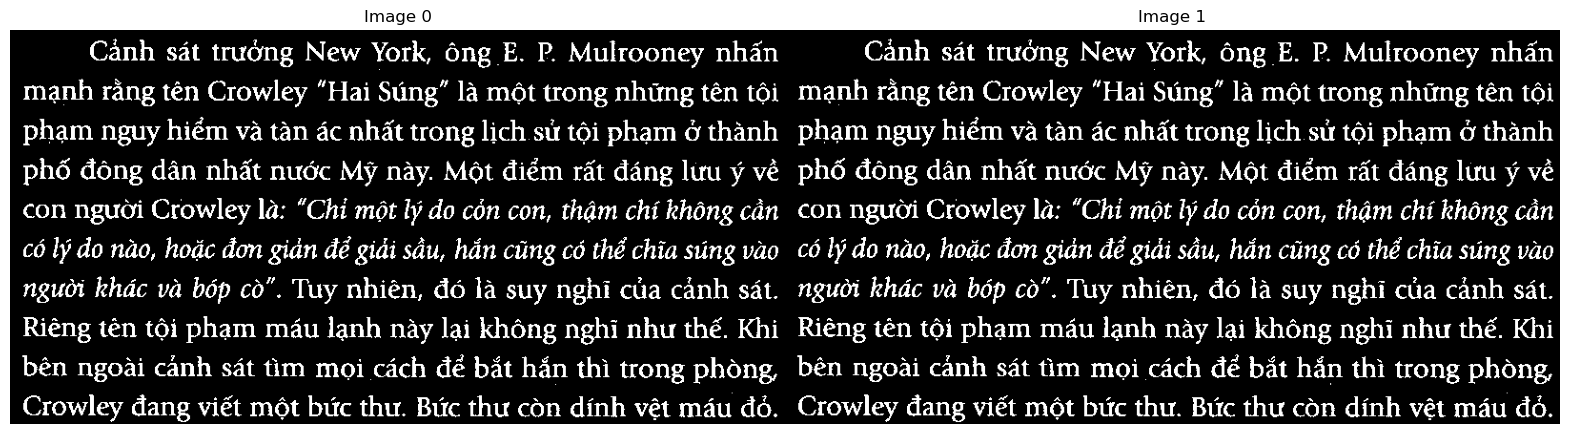

150.0


In [6]:
image_mask01 = (image_gray_1 < 150).astype(np.uint8) * 255  # Change 0-1 to range 0-255
thresh, image_mask02 = cv2.threshold(image_gray_1,150,255,cv2.THRESH_BINARY_INV)
ShowImage([image_mask01, image_mask02], 1, 2)
print(thresh)

Giá trị của pixel đầu ra là giá trị lớn nhất trong tất cả các pixel trong vùng lân cận. Trong một hình ảnh nhị phân, một pixel được đặt thành 1 nếu bất kỳ pixel láng giềng nào có giá trị là 1. Phép co rộng hình thái học làm cho các đối tượng trở nên rõ ràng hơn và lấp đầy các lỗ nhỏ trong các đối tượng.

In [7]:
print(image_mask01.min(), image_mask01.max())
print(image_mask02.min(), image_mask02.max())

0 255
0 255


[[1 1 1]
 [1 1 1]
 [1 1 1]]


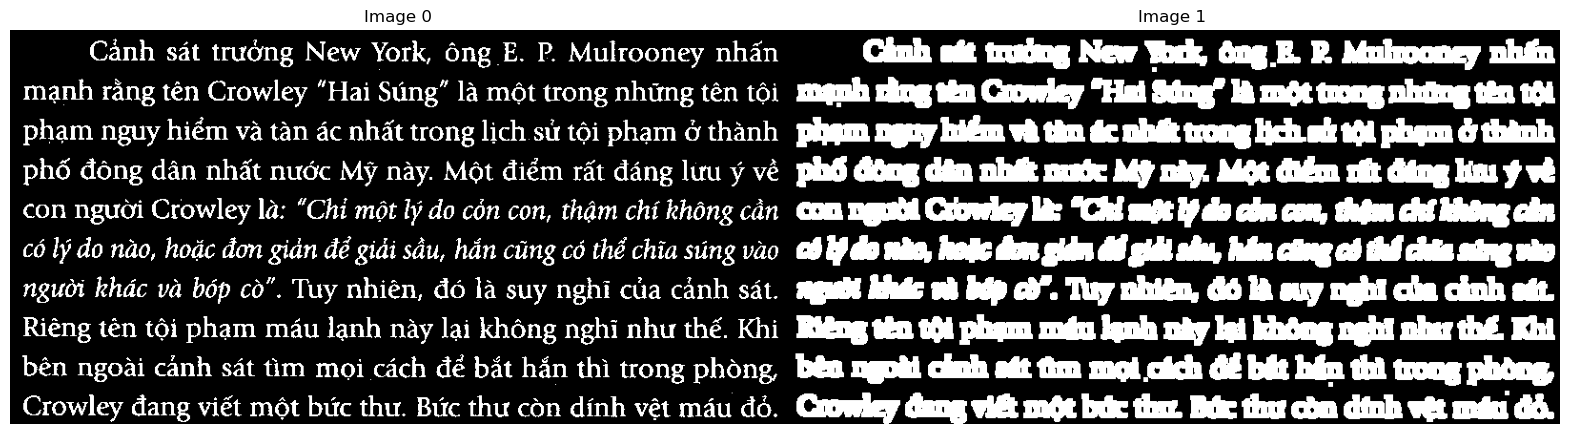

In [8]:
kernel = np.ones((3,3),np.uint8)
print(kernel)
image_dilated = cv2.dilate(image_mask01, kernel, iterations = 2)
ShowImage([image_mask01, image_dilated], 1, 2)

Cách thức hoạt động của dilation là duyệt qua từng pixel trong hình ảnh và thay đổi giá trị của pixel đó dựa trên các pixel láng giềng xung quanh theo một quy tắc nhất định. Mục tiêu là tăng giá trị của pixel cụ thể lên giá trị tối đa trong vùng lân cận, thường sử dụng các ma trận cơ sở (kernel) để xác định vùng lân cận và quy tắc thay đổi giá trị.

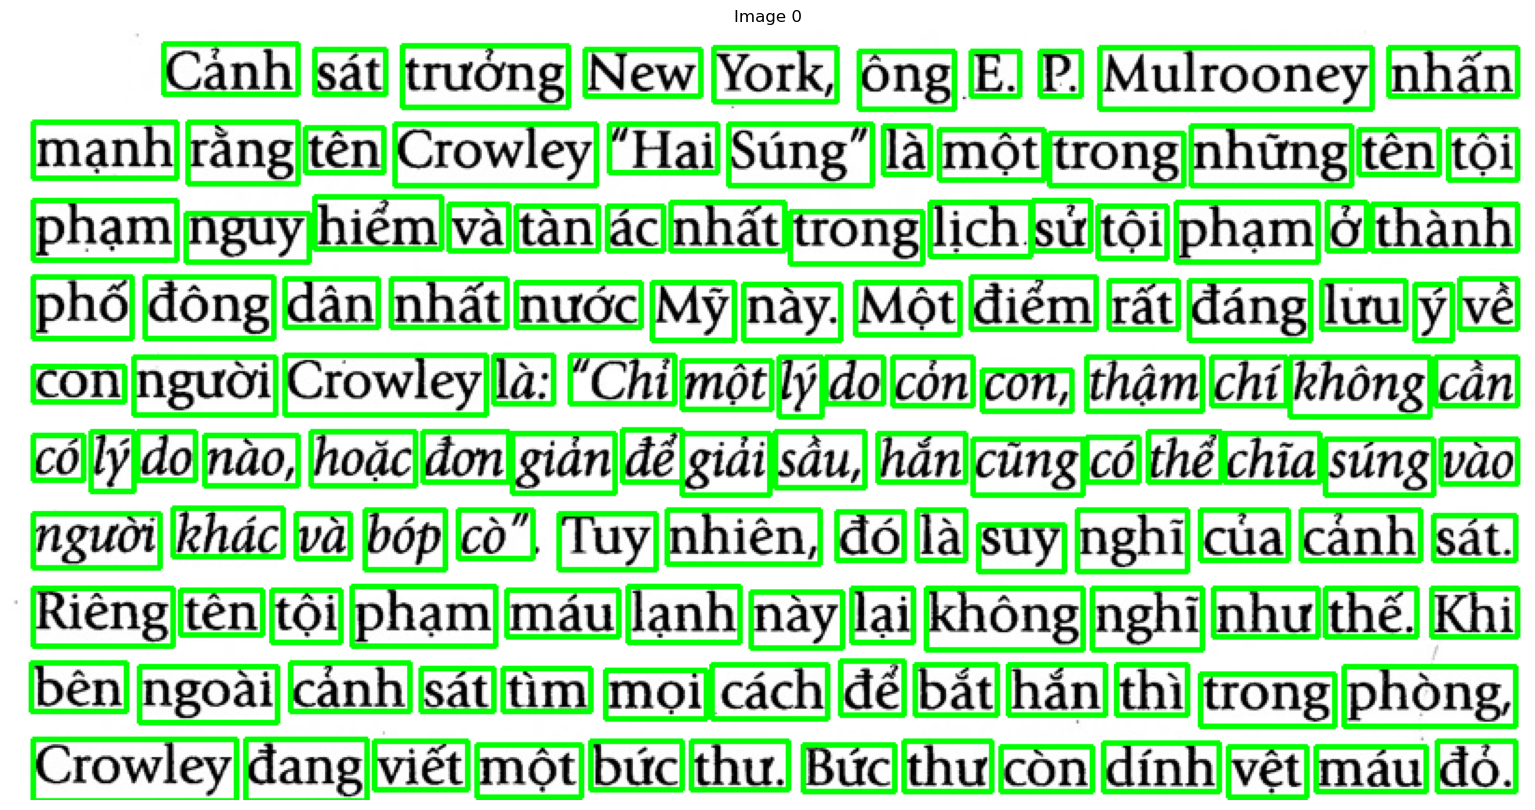

x    y    w   h
0    700  384   59  24
1    653  384   42  27
2    531  384   49  24
3    425  383   49  25
4    250  383   56  28
..   ...  ...  ...  ..
129  739    9   69  26
130  584    9  146  33
131  377    9   66  29
132  210    8   89  33
133   82    7   72  27

[134 rows x 4 columns]

In [9]:
result = image_1.copy()

contours, hierarchy = cv2.findContours(image_dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = 0
DataDF = pd.DataFrame(columns = ["x", "y", "w", "h"])
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if(w * h > 300):
        cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),2)
        DataDF.loc[count,:] = (x,y,w,h)
        count = count + 1
DataDF = DataDF.astype(int)

ShowImage([result], 1, 1)
display(DataDF)

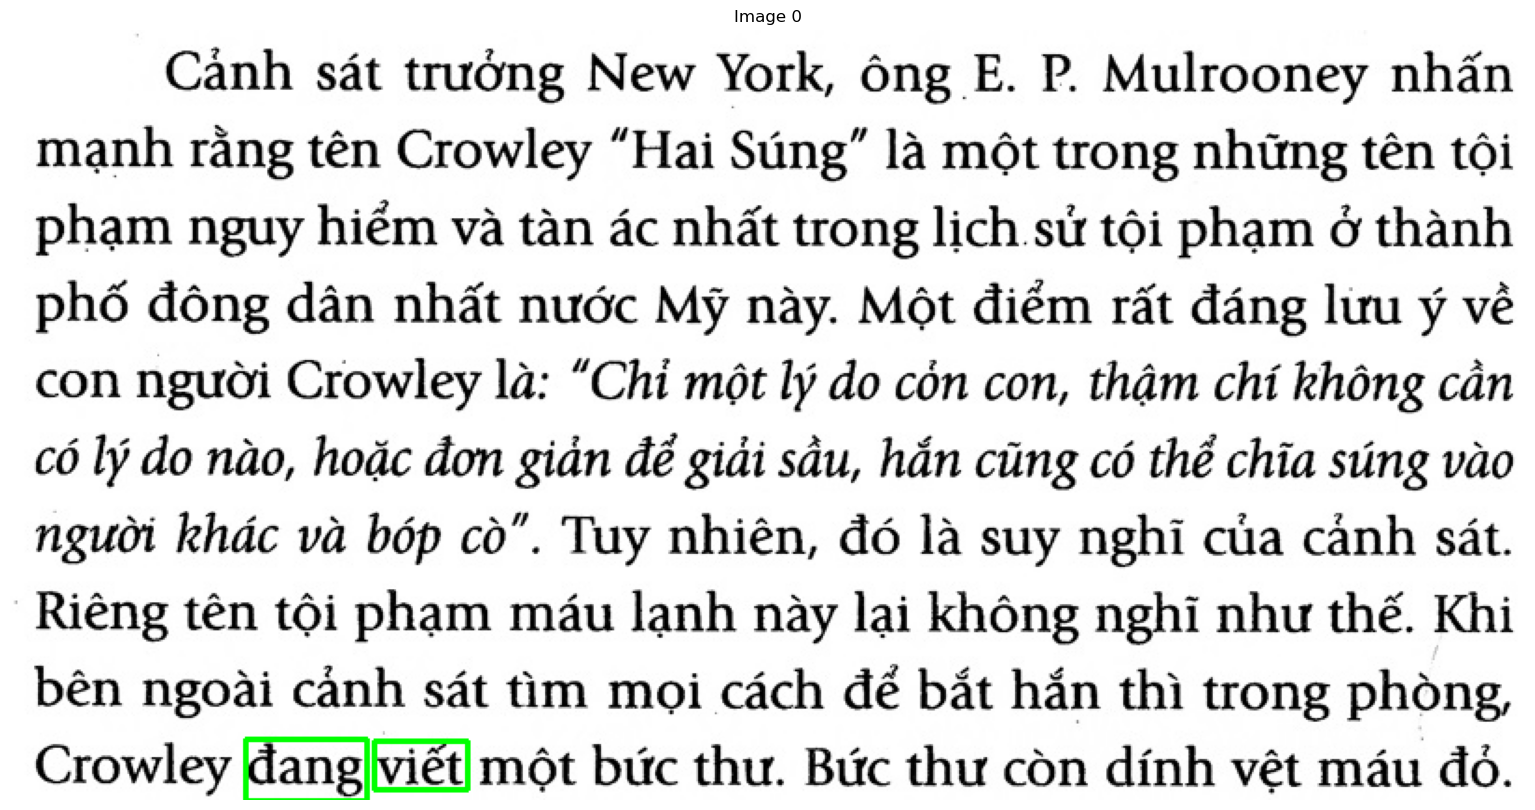

In [10]:
result01 = image_1.copy()
idx = 10
x,y,w,h = DataDF.loc[idx, ["x", "y", "w", "h"]]
cv2.rectangle(result01,(x,y),(x+w,y+h),(0,255,0),2) 

idx = 11
x,y,w,h = DataDF.loc[idx, ["x", "y", "w", "h"]]
cv2.rectangle(result01,(x,y),(x+w,y+h),(0,255,0),2) 

ShowImage([result01], 1, 1)

## Erosion

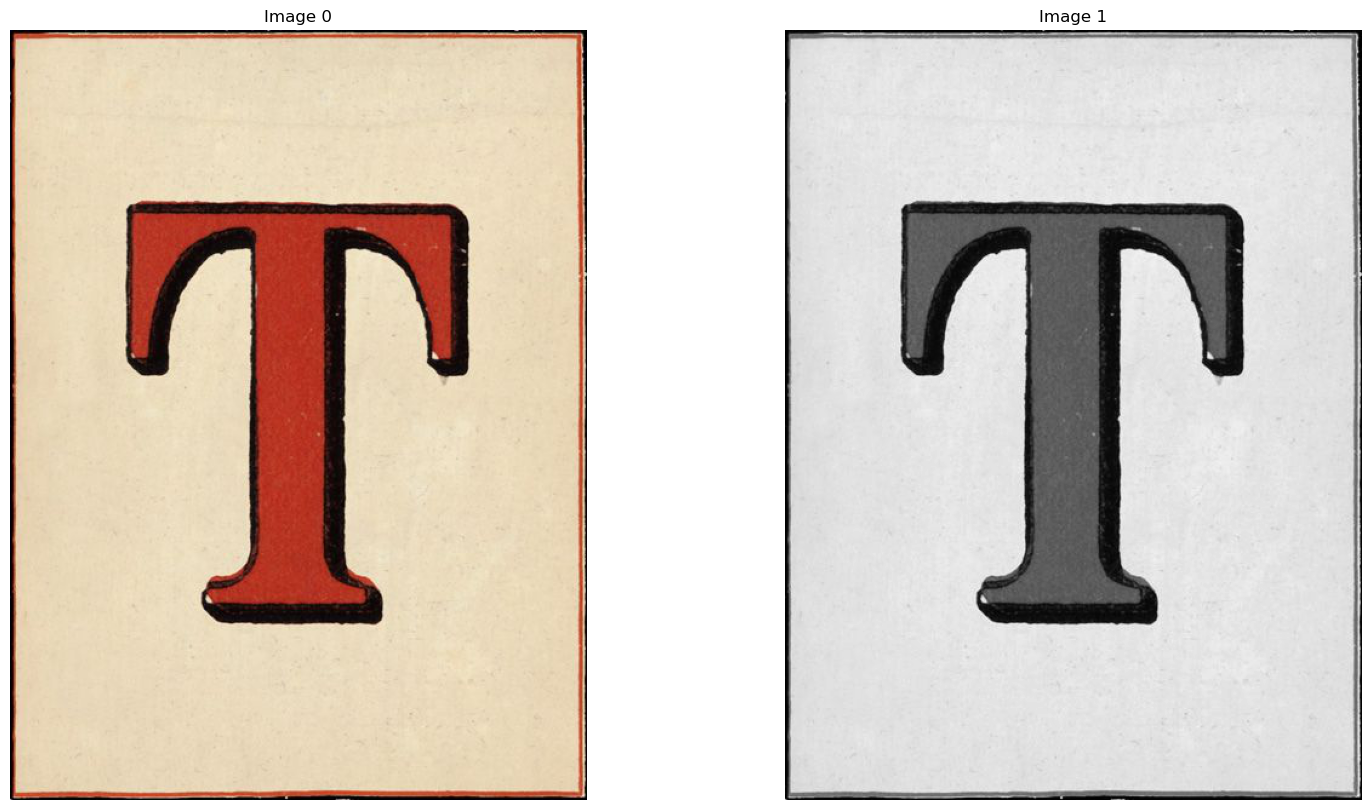

In [11]:
image_2 = imread("Alphabet.jpg")
# Convert Image into Gray
image_gray_2 = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_2, image_gray_2], 1, 2)

Ý tưởng cơ bản của phép xói mòn (erosion) tương tự như sự xói mòn đất, nó xói mòn các ranh giới của đối tượng phần trước (luôn cố gắng giữ cho phần trước là màu trắng). Vậy nó làm gì? Kernel trượt qua hình ảnh (như trong phép tích chập 2D). Một pixel trong hình ảnh gốc (hoặc là 1 hoặc là 0) chỉ được xem xét là 1 nếu tất cả các pixel dưới kernel đều là 1, nếu không nó sẽ bị xói mòn (trở thành 0).

Kết quả là tất cả các pixel gần biên giới sẽ bị loại bỏ tùy thuộc vào kích thước của kernel. Vì vậy độ dày hoặc kích thước của đối tượng phần trước giảm đi hoặc đơn giản là khu vực màu trắng giảm đi trong hình ảnh. Phép xói mòn hữu ích để loại bỏ các nhiễu màu trắng nhỏ (như chúng ta đã thấy trong chương không gian màu), tách hai đối tượng kết nối với nhau, v.v.

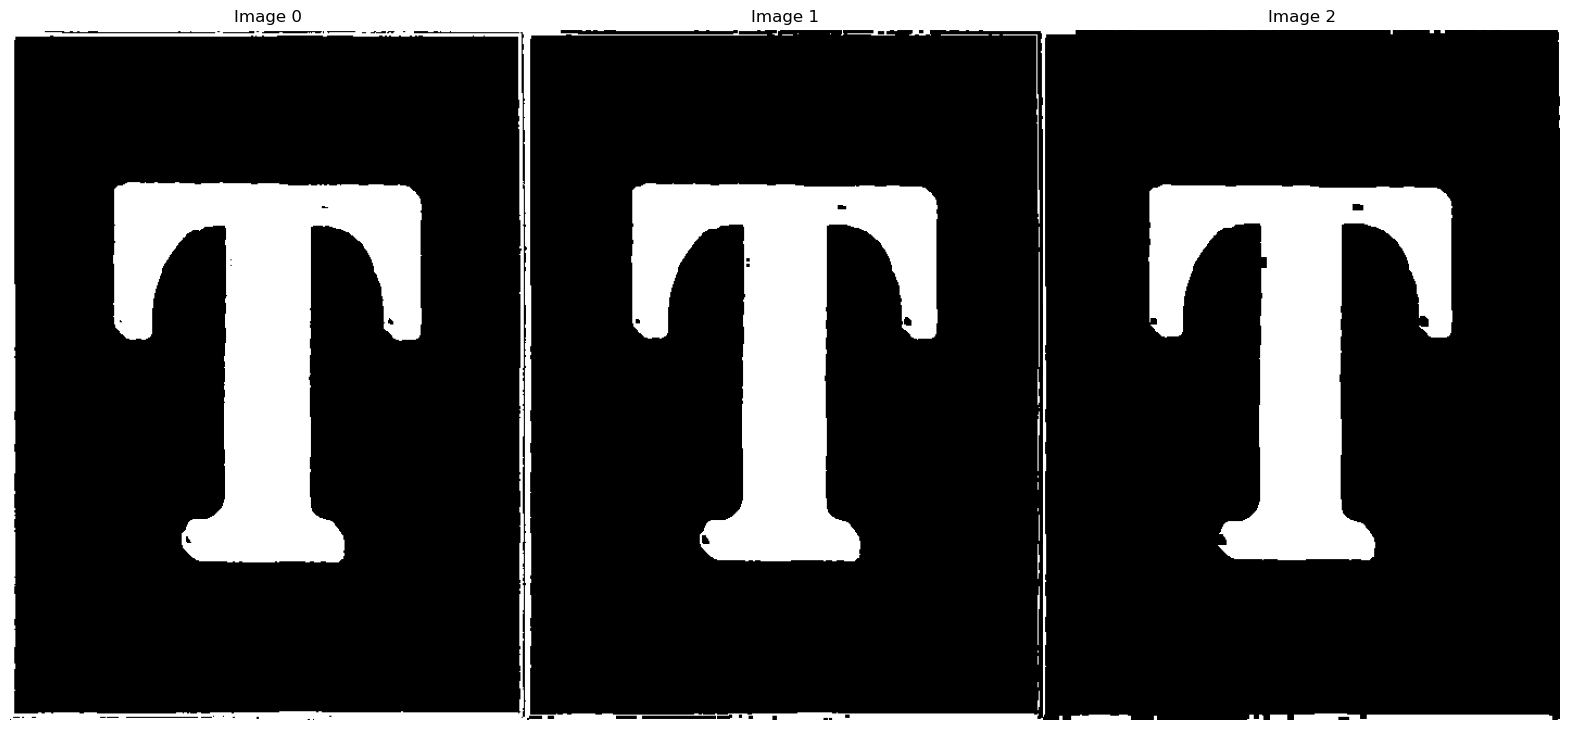

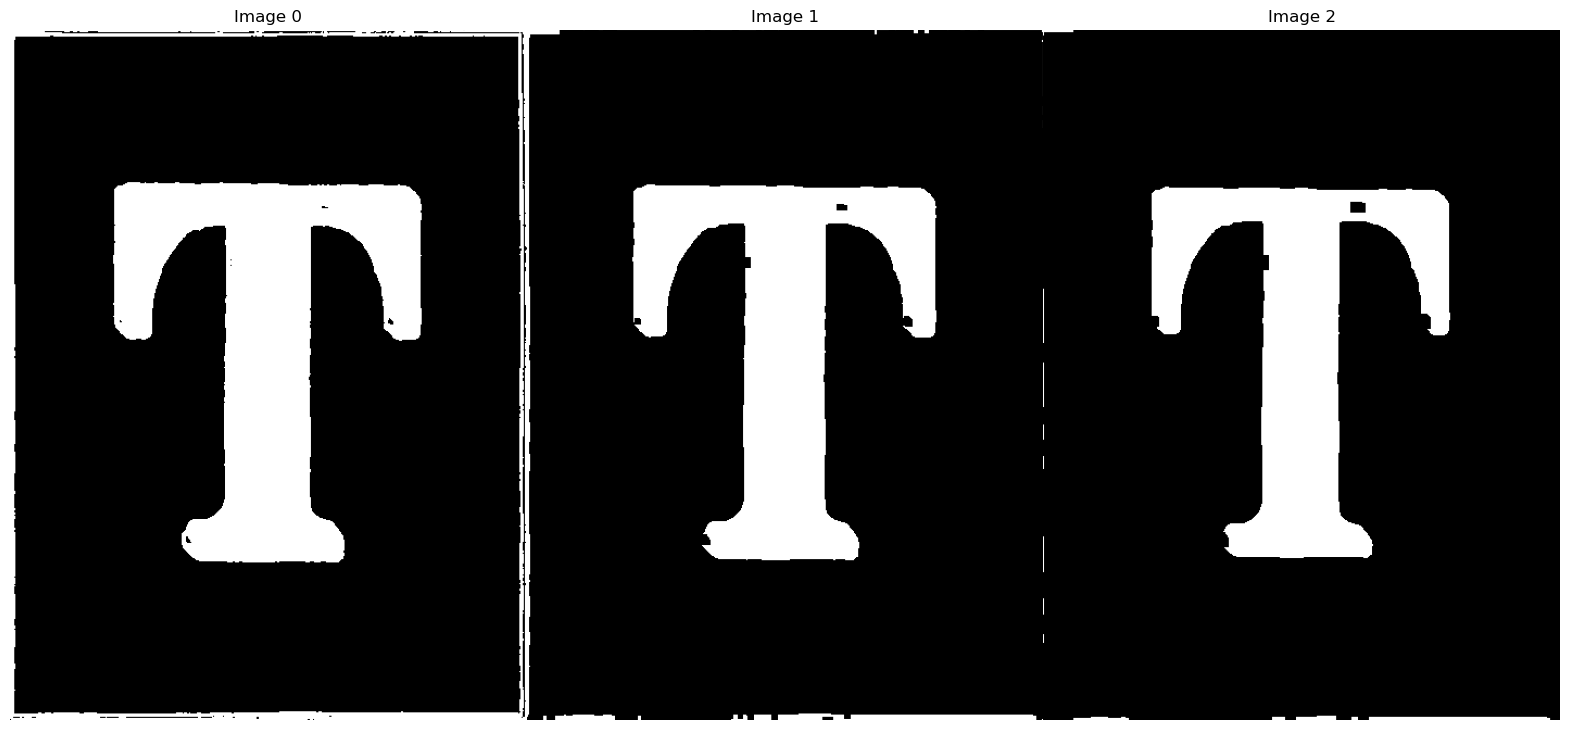

In [12]:
thresh, image_mask = cv2.threshold(image_gray_2,150,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((3,3),np.uint8)
image_erosion01 = cv2.erode(image_mask,kernel,iterations = 1)
image_erosion02 = cv2.erode(image_mask,kernel,iterations = 2)

kernel = np.ones((5,5),np.uint8)
image_erosion03 = cv2.erode(image_mask,kernel,iterations = 1)
image_erosion04 = cv2.erode(image_mask,kernel,iterations = 2)

ShowImage([image_mask, image_erosion01, image_erosion02], 1, 3)
ShowImage([image_mask, image_erosion03, image_erosion04], 1, 3)

## Closing

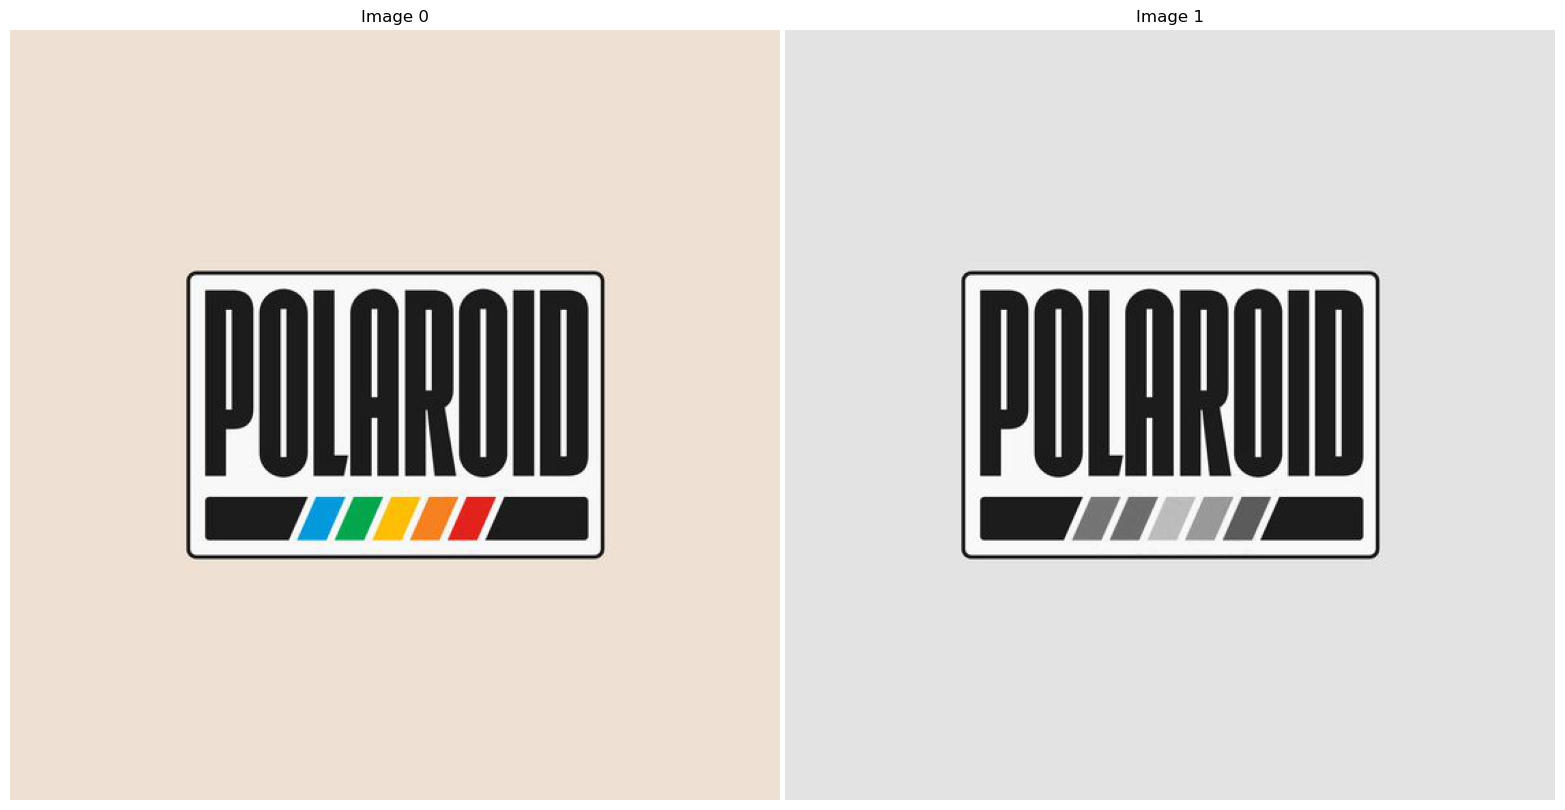

In [13]:
image_3 = imread("Logo(1).jpg")
# Convert Image into Gray
image_gray_3 = cv2.cvtColor(image_3, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_3, image_gray_3], 1, 2)

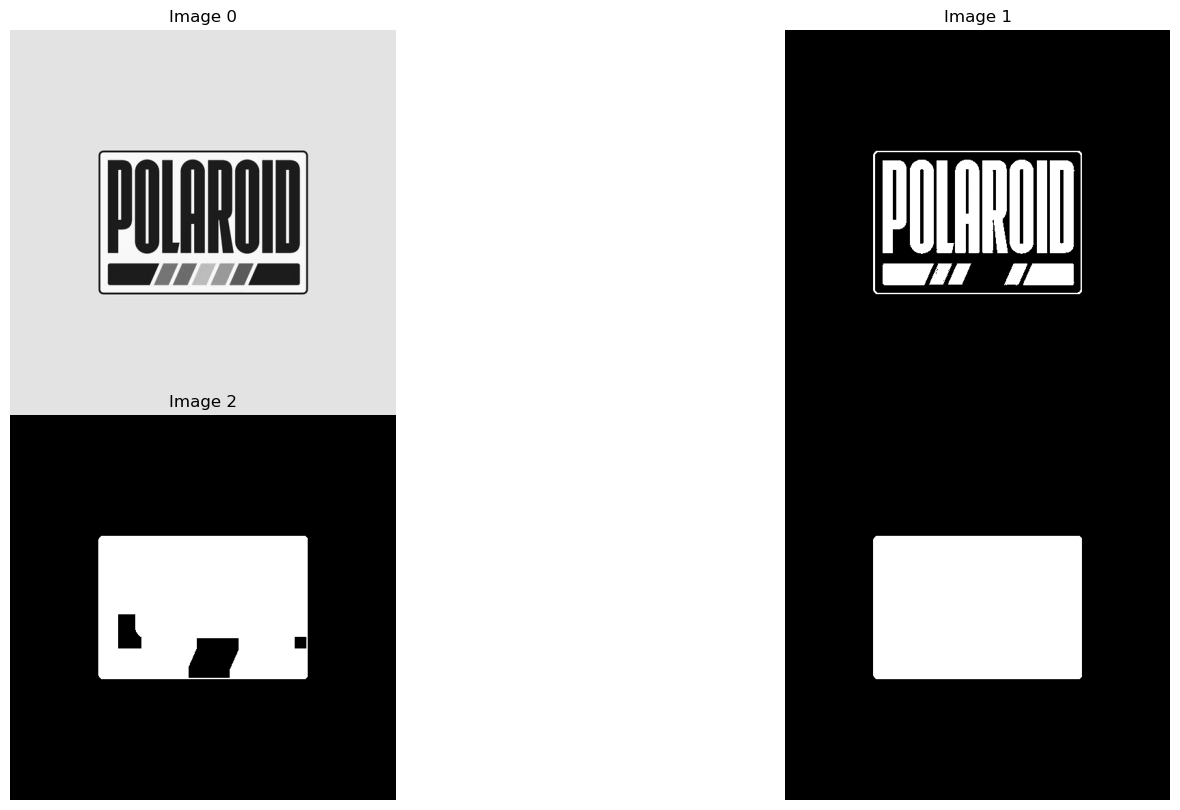

In [14]:
thresh, image_mask = cv2.threshold(image_gray_3,125,255,cv2.THRESH_BINARY_INV)

image_closing = cv2.morphologyEx(image_mask, cv2.MORPH_CLOSE, kernel,iterations = 4)
kernel = np.ones((4,4),np.uint8)

from scipy import ndimage as ndi
image_fill = ndi.binary_fill_holes(image_closing)

ShowImage([image_gray_3, image_mask, image_closing, image_fill], 2, 2)

### Opening

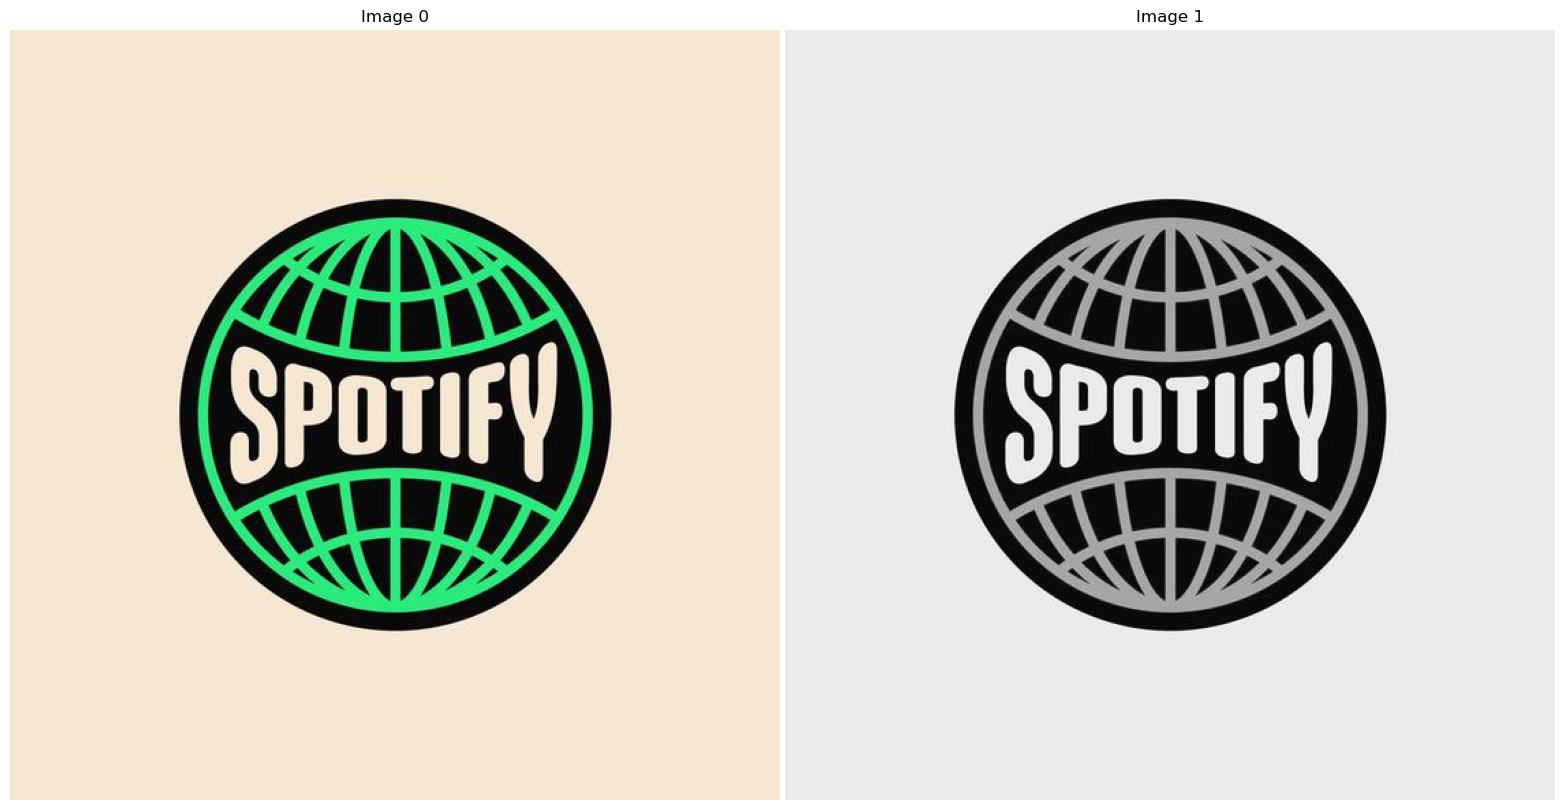

In [15]:
image_4 = imread("Logo(2).jpg")
# Convert Image into Gray
image_gray_4 = cv2.cvtColor(image_4, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_4, image_gray_4], 1, 2)

Thực hiện phép mở (opening) hình thái học. Phép mở hình thái học thực hiện việc xói mòn một hình ảnh sau đó co rộng hình ảnh đã bị xói mòn, sử dụng cùng một yếu tố cấu trúc cho cả hai phép biến đổi. Phép mở hình thái học hữu ích để loại bỏ các đối tượng nhỏ từ một hình ảnh trong khi vẫn giữ nguyên hình dạng và kích thước của các đối tượng lớn hơn trong hình ảnh.

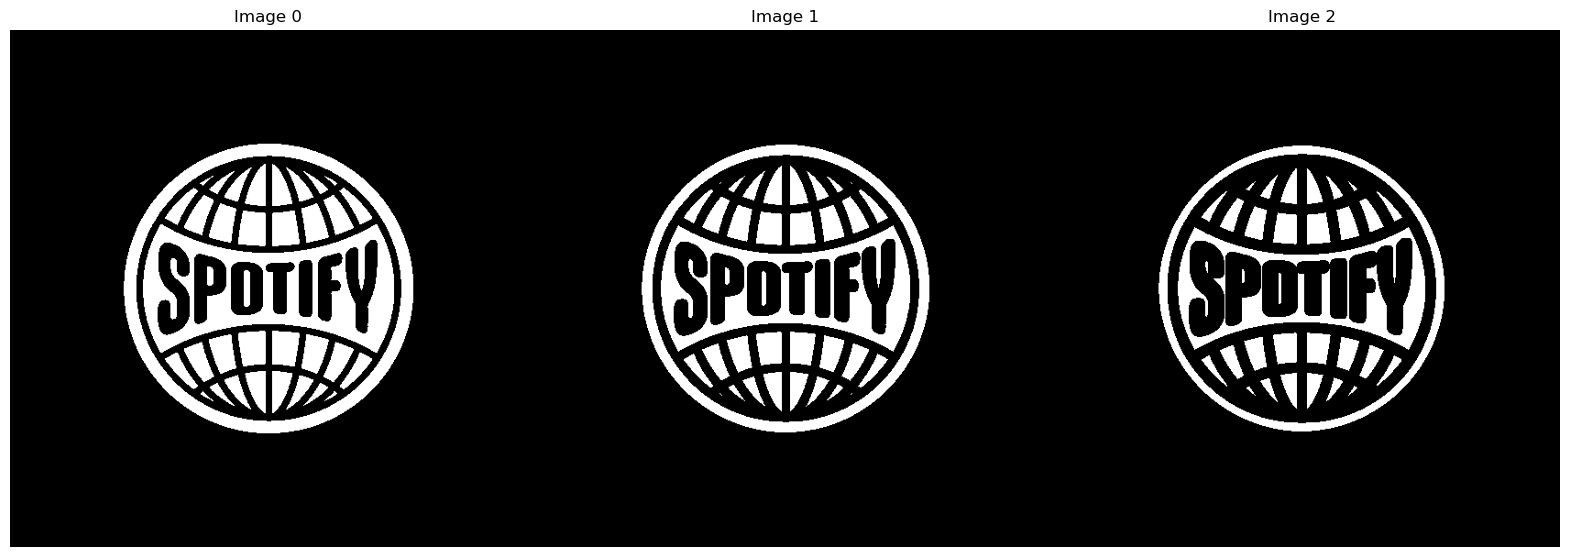

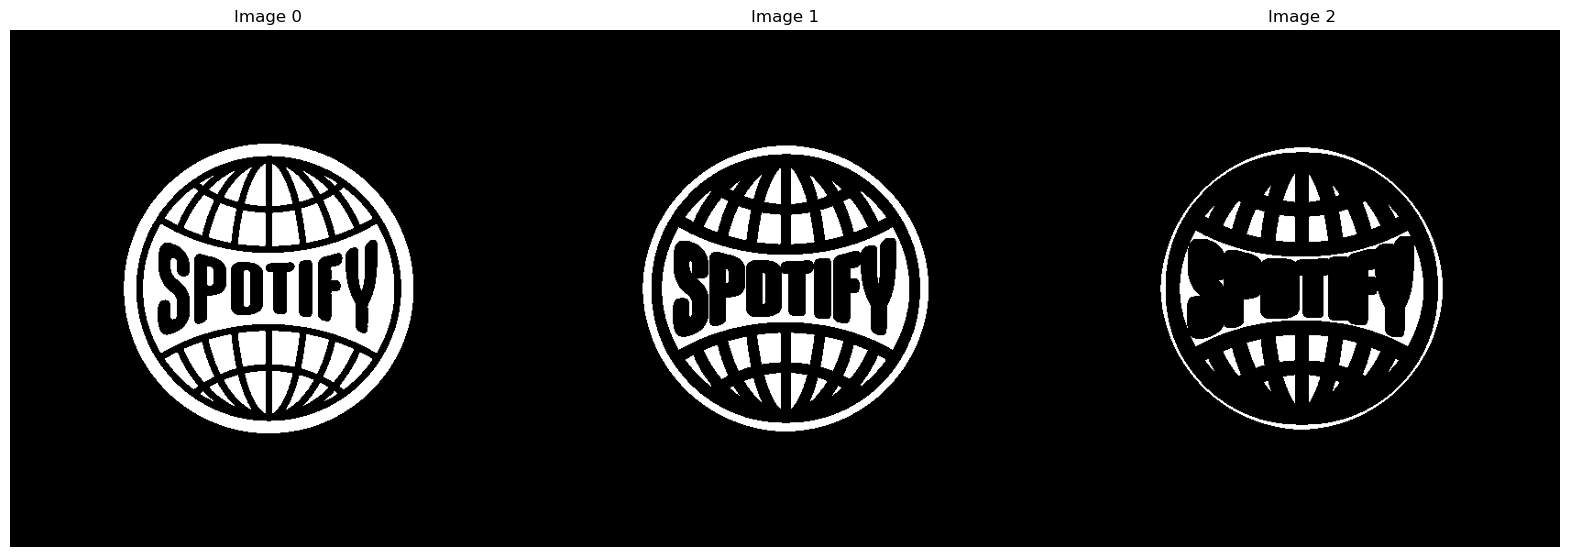

In [16]:
thresh, image_mask = cv2.threshold(image_gray_4,100,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((3,3),np.uint8)
image_erosion01 = cv2.erode(image_mask,kernel,iterations = 1)
image_erosion02 = cv2.erode(image_mask,kernel,iterations = 2)

kernel = np.ones((5,5),np.uint8)
image_erosion03 = cv2.erode(image_mask,kernel,iterations = 1)
image_erosion04 = cv2.erode(image_mask,kernel,iterations = 2)

ShowImage([image_mask, image_erosion01, image_erosion02], 1, 3)
ShowImage([image_mask, image_erosion03, image_erosion04], 1, 3)

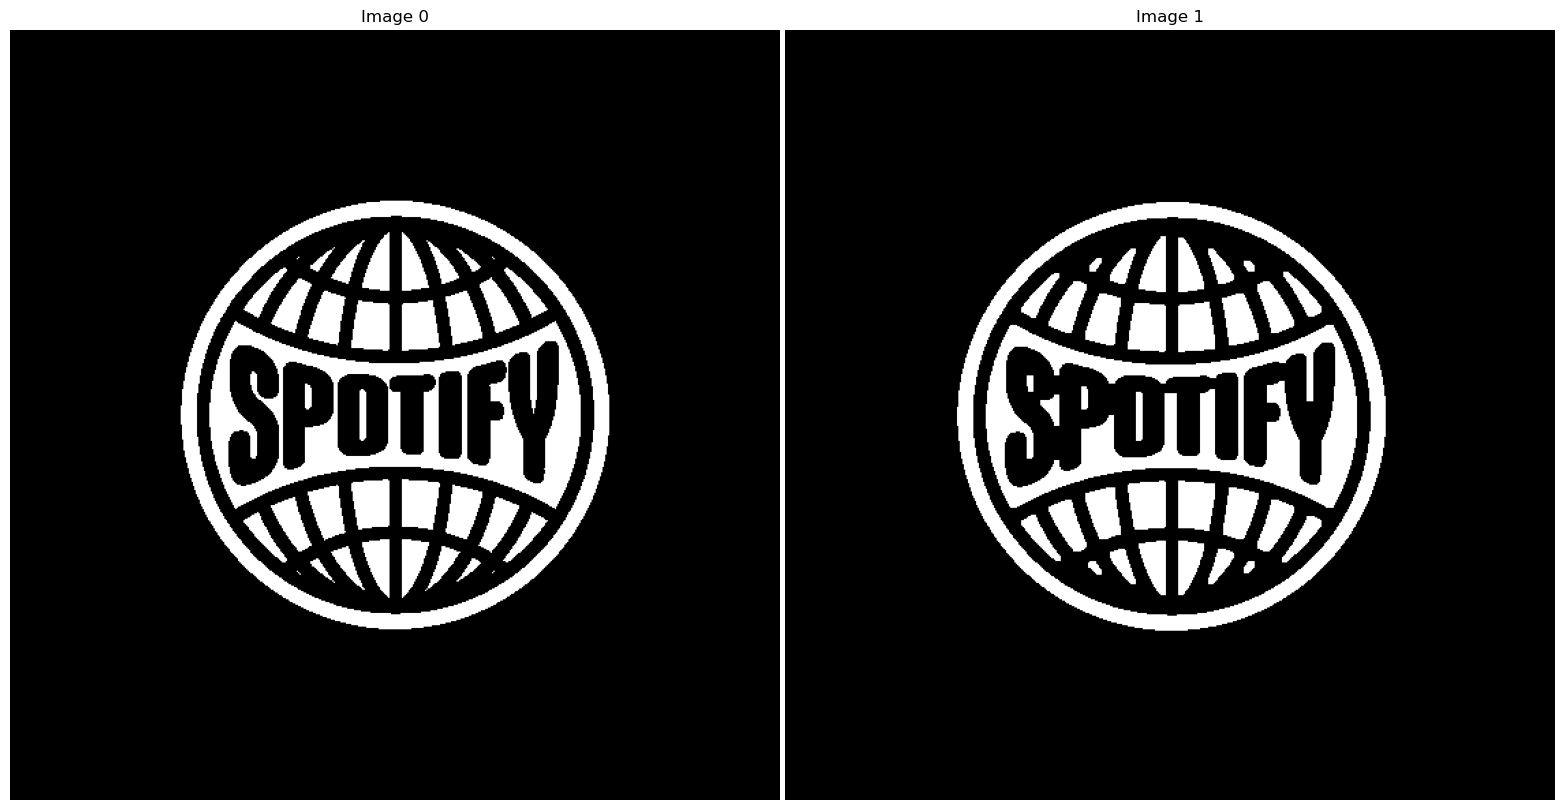

In [17]:
image_mask = image_erosion01.copy()
kernel = np.ones((4,4),np.uint8)

image_opening = cv2.morphologyEx(image_mask, cv2.MORPH_OPEN, kernel)
ShowImage([image_mask, image_opening], 1, 2)

## Gradient

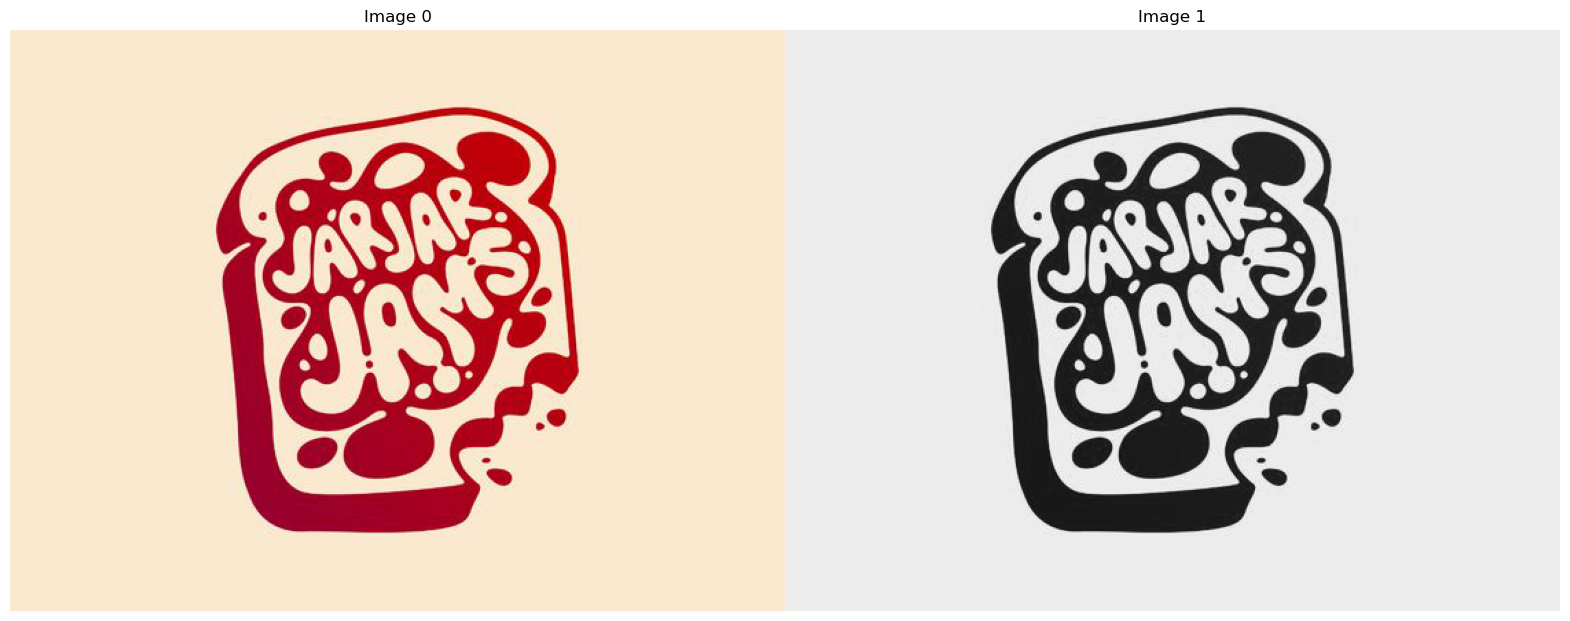

In [18]:
image_5 = imread("Logo(3).jpg")
# Convert Image into Gray
image_gray_5 = cv2.cvtColor(image_5, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_5, image_gray_5], 1, 2)

Gradient là sự khác biệt giữa sự co rộng (dilation) và sự xói mòn (erosion) của 1 ảnh. Kết quả sẽ như là đường viền của đối tượng trong ảnh.

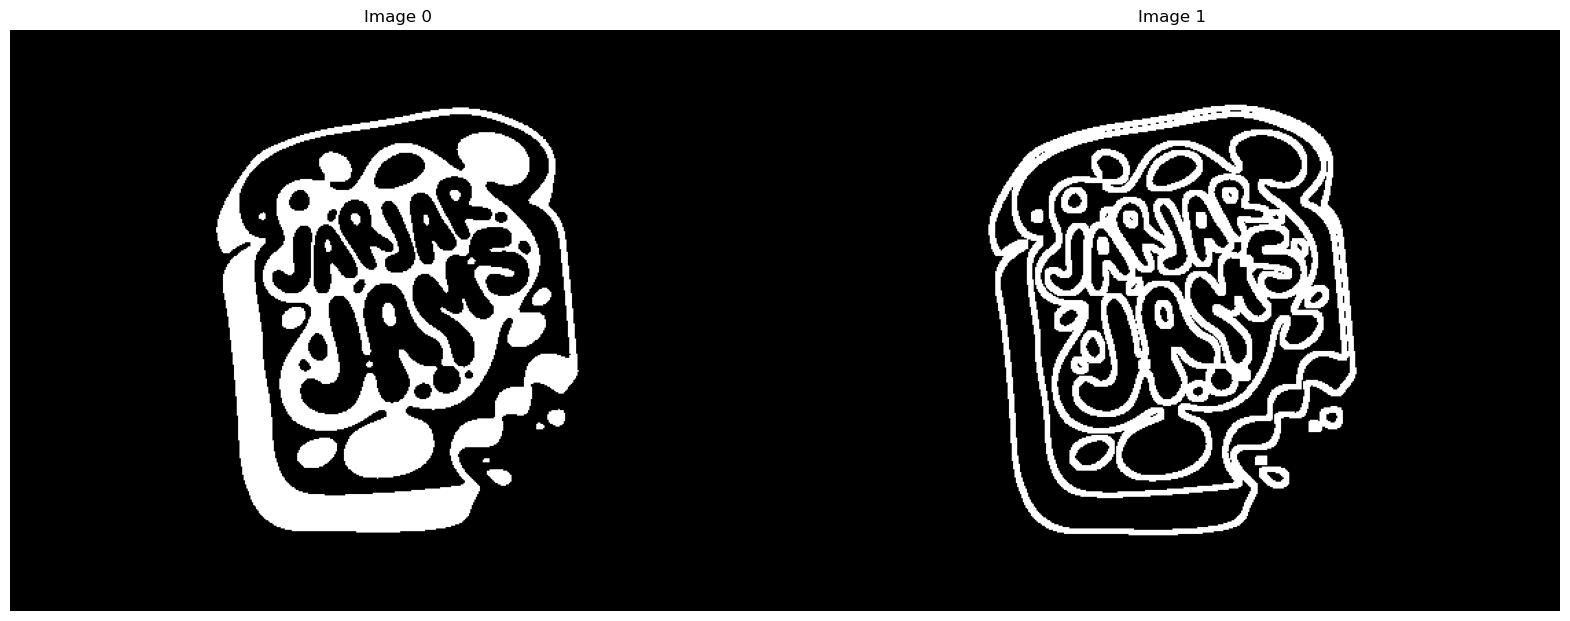

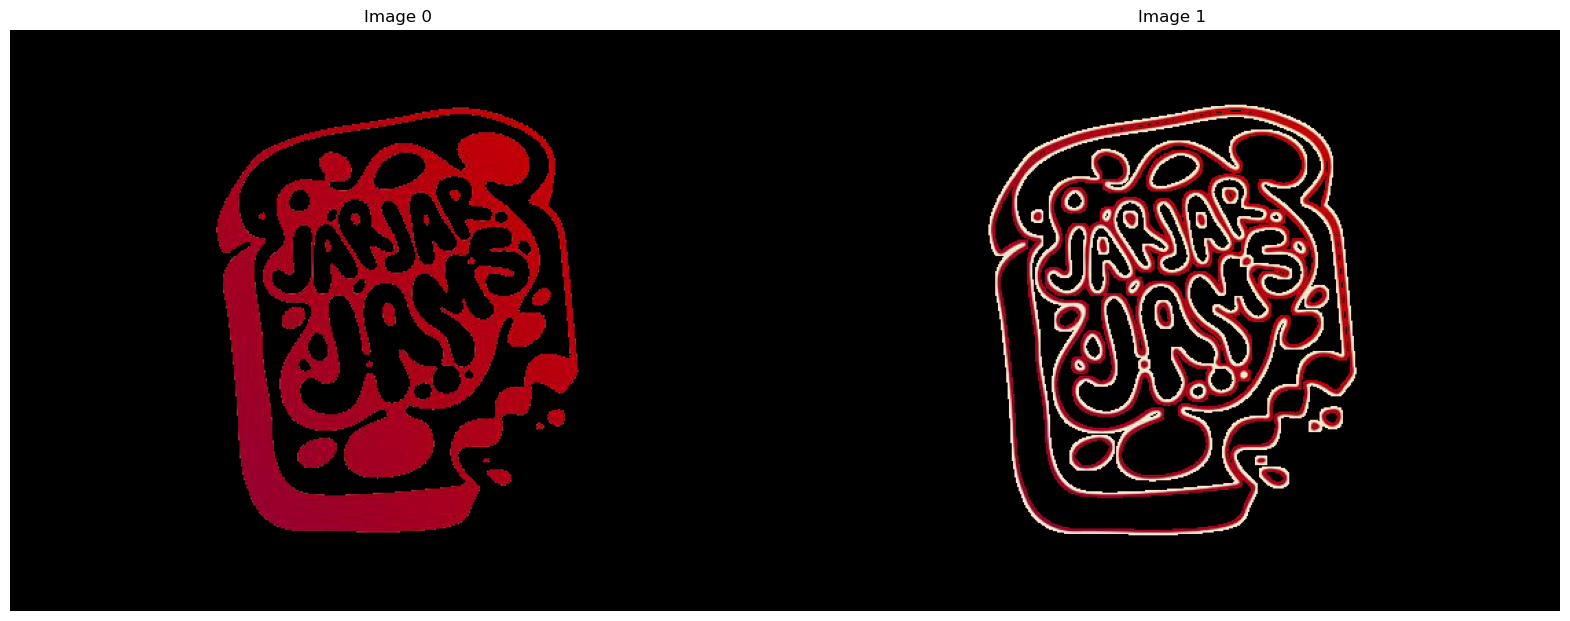

In [19]:
thresh, image_mask = cv2.threshold(image_gray_5,100,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5),np.uint8)
image_gradient = cv2.morphologyEx(image_mask, cv2.MORPH_GRADIENT, kernel)

image_mask_color = cv2.bitwise_and(image_5, image_5, mask = image_mask)
image_gradient_color = cv2.bitwise_and(image_5, image_5, mask = image_gradient)

ShowImage([image_mask, image_gradient], 1, 2)
ShowImage([image_mask_color, image_gradient_color], 1, 2)

# 2/ Kiếm một ảnh biển số xe và thực hiện kết hợp các phương pháp Morphology để trích các con số trên biển số xe 

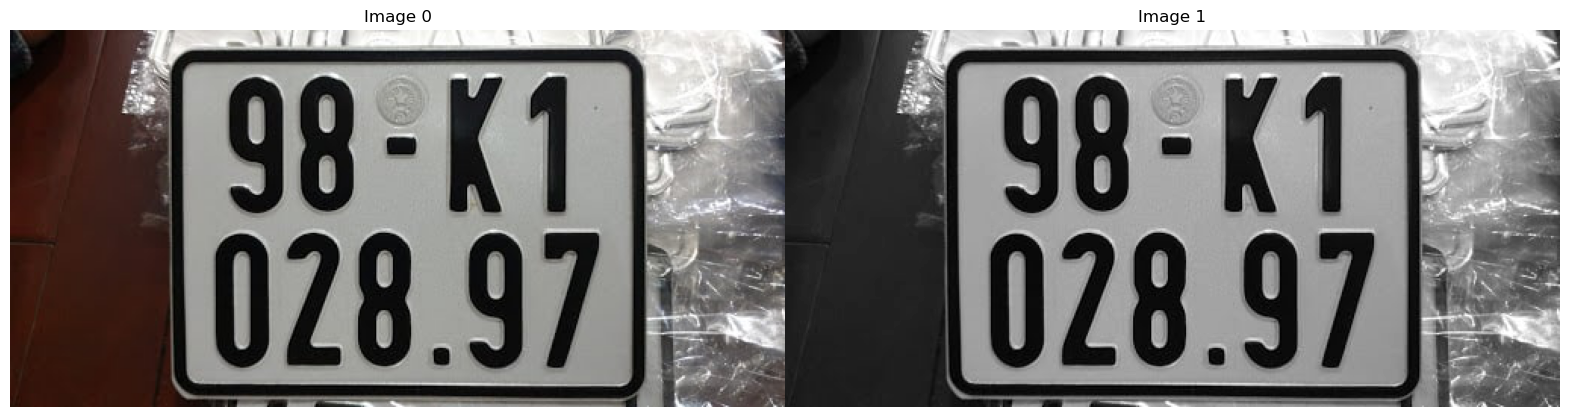

In [20]:
image_6 = imread("Number.jpg")
# Convert Image into Gray
image_gray_6 = cv2.cvtColor(image_6, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_6, image_gray_6], 1, 2)

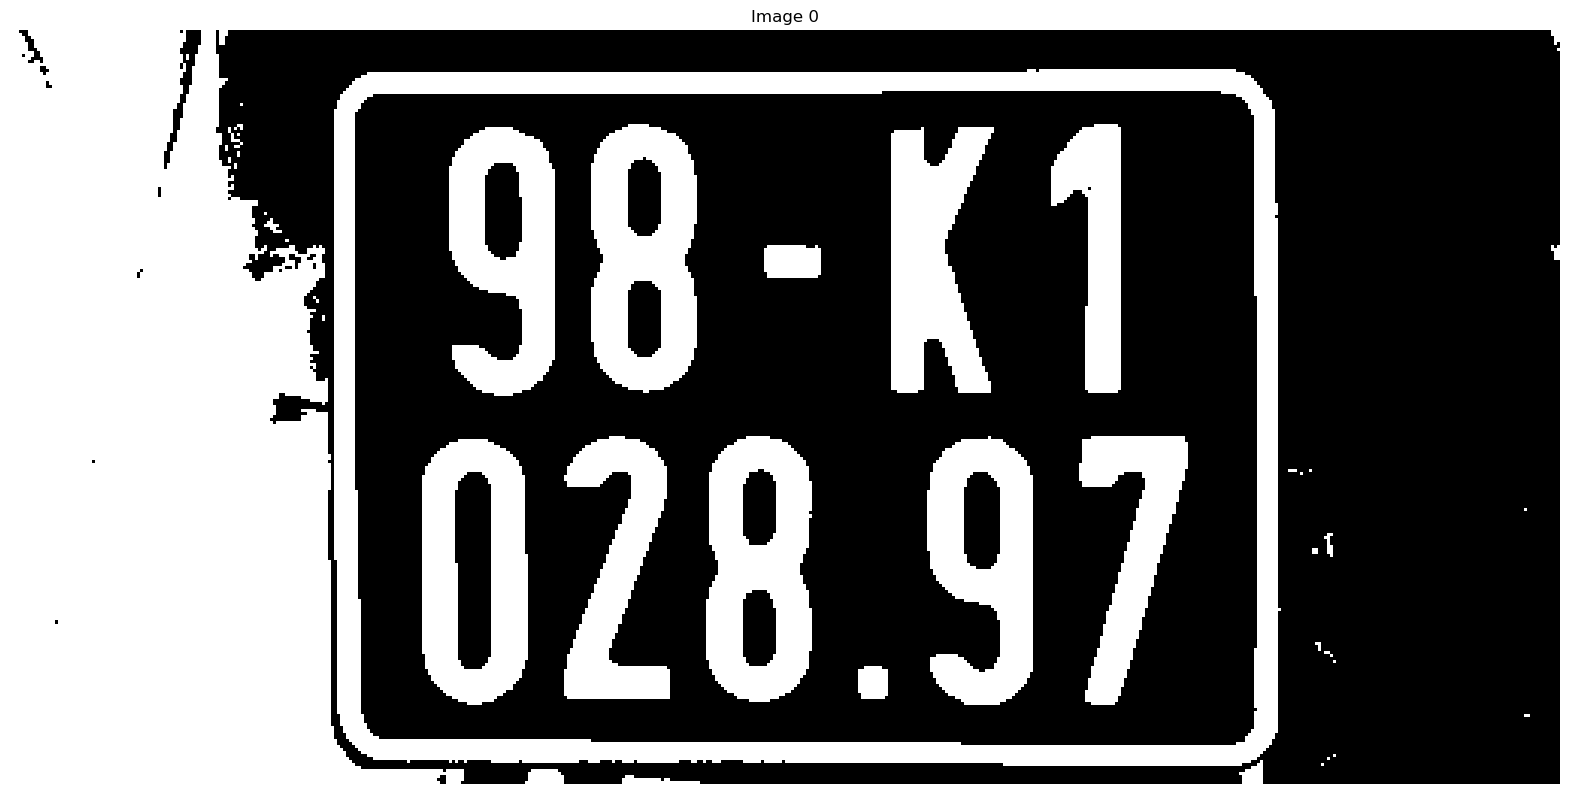

In [21]:
thresh, image_mask = cv2.threshold(image_gray_6,50,255,cv2.THRESH_BINARY_INV)
ShowImage([image_mask], 1, 1)

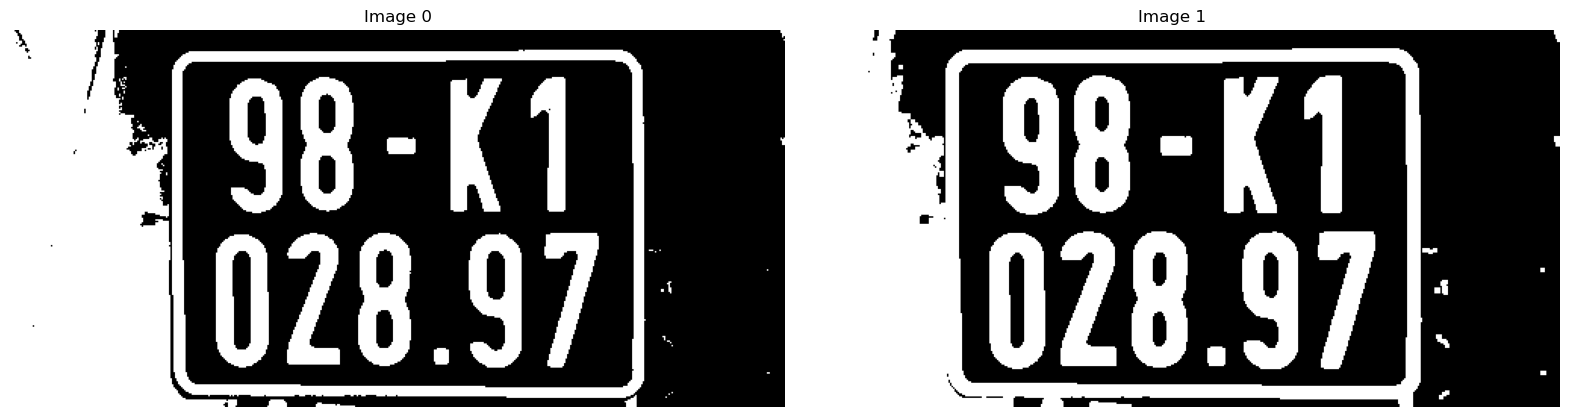

In [22]:
kernel = np.ones((3,3),np.uint8)
image_dilated = cv2.dilate(image_mask, kernel, iterations = 1)
ShowImage([image_mask, image_dilated], 1, 2)

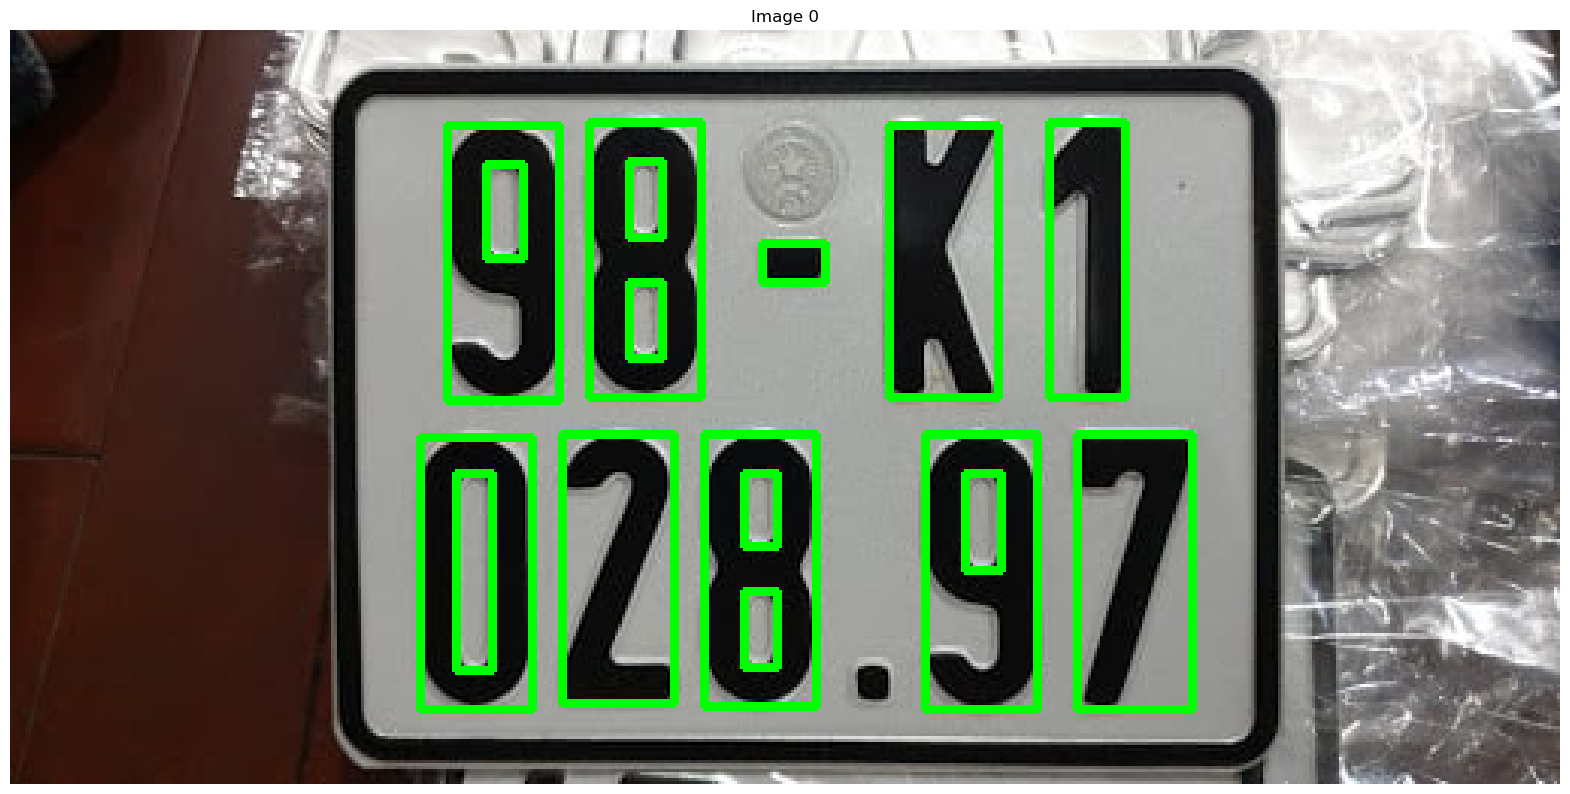

In [23]:
result = image_6.copy()

contours, hierarchy = cv2.findContours(image_dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = 0
DataDF = pd.DataFrame(columns = ["x", "y", "w", "h"])
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if(w * h > 200) and (w * h < 5000):
        cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),2)
        DataDF.loc[count,:] = (x,y,w,h)
        count = count + 1
DataDF = DataDF.astype(int)
ShowImage([result], 1, 1)

# 3/ Kiếm một ảnh chụp biển hiệu shop bán hàng kết hợp các phương pháp Morphology để trích các thông tin cửa hiệu


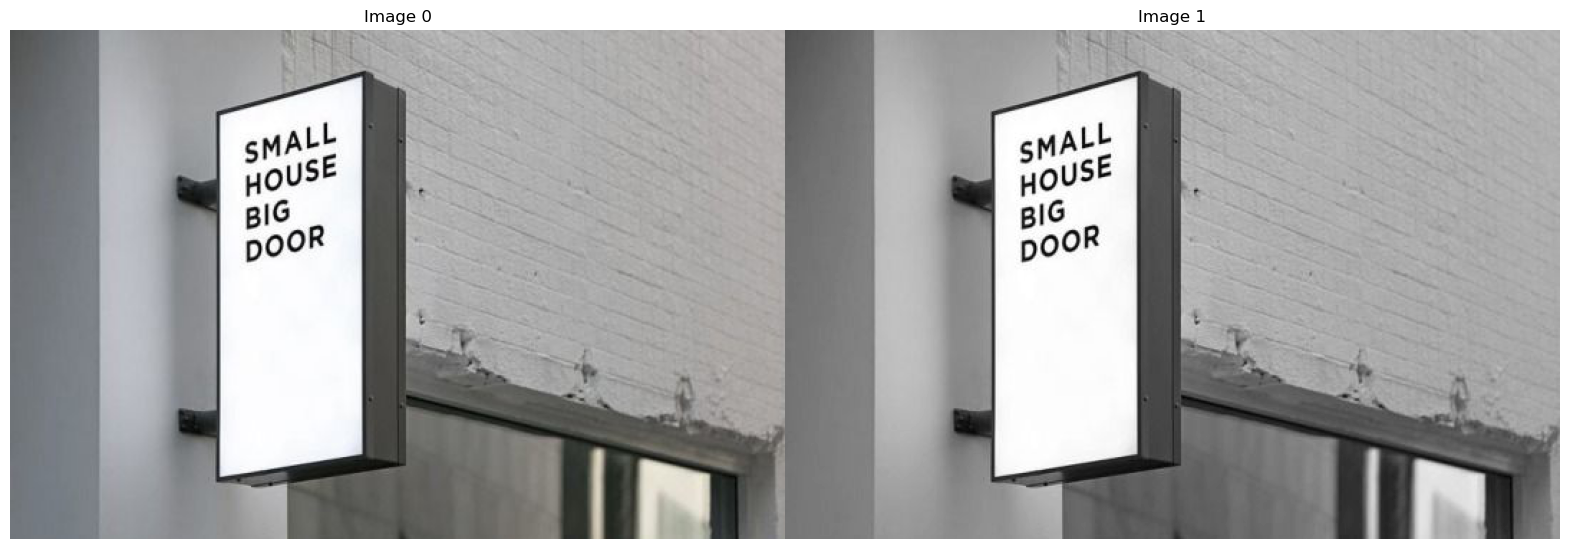

In [24]:
image_7 = imread("Bienhieu.jpg")
# Convert Image into Gray
image_gray_7 = cv2.cvtColor(image_7, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_7, image_gray_7], 1, 2)

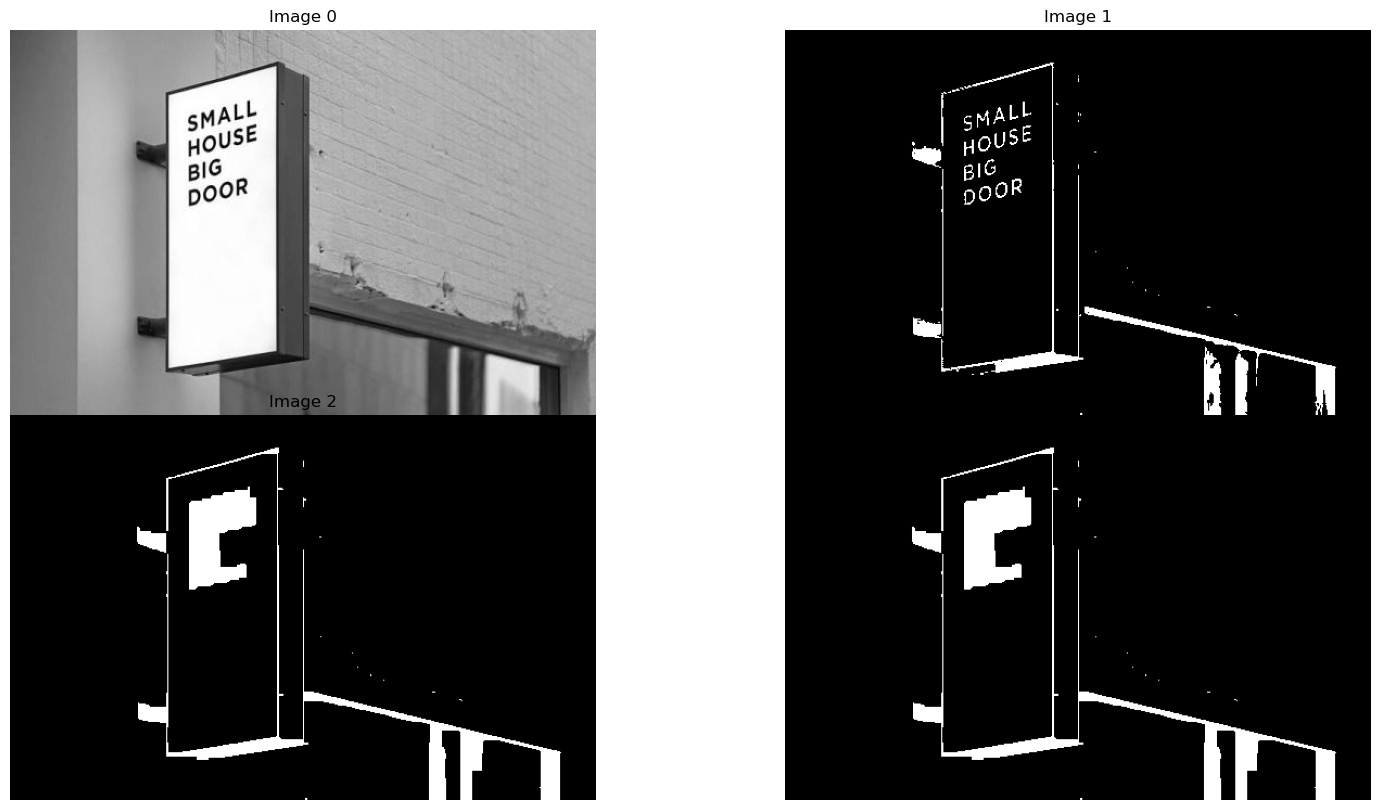

In [25]:
thresh, image_mask = cv2.threshold(image_gray_7,50,255,cv2.THRESH_BINARY_INV)
image_closing = cv2.morphologyEx(image_mask, cv2.MORPH_CLOSE, kernel,iterations = 6)

from scipy import ndimage as ndi
image_fill = ndi.binary_fill_holes(image_closing)

ShowImage([image_gray_7, image_mask, image_closing, image_fill], 2, 2)

In [26]:
from skimage.measure import label, regionprops

image_label = label(image_fill) # Label each area in the image from 1 to n
print("index of each region from 1 to", image_label.max())

index of each region from 1 to 14


In [27]:
import pandas as pd
from skimage.measure import regionprops

regions = regionprops(image_label, intensity_image=image_gray_7)
ColList = ["label", "at_row", "at_col",
           "area", "minr", "minc", "maxr", "maxc", "width", "height",
           "max_intensity", "mean_intensity", "min_intensity"]

LabelDF = pd.DataFrame(columns=ColList)
for props in regions:
    RowList = []
    label = props.label
    if "label" in ColList:
        RowList.append(label)

    at_row, at_col = props.centroid
    if "at_row" in ColList:
        RowList.append(at_row)

    if "at_col" in ColList:
        RowList.append(at_col)

    if "area" in ColList:
        RowList.append(props.area)

    minr, minc, maxr, maxc = props.bbox
    if "minr" in ColList:
        RowList.append(minr)

    if "minc" in ColList:
        RowList.append(minc)

    if "maxr" in ColList:
        RowList.append(maxr)

    if "maxc" in ColList:
        RowList.append(maxc)

    if "width" in ColList:
        RowList.append(maxc - minc)

    if "height" in ColList:
        RowList.append(maxr - minr)

    if "max_intensity" in ColList:
        RowList.append(props.max_intensity)

    if "mean_intensity" in ColList:
        RowList.append(props.mean_intensity)

    if "min_intensity" in ColList:
        RowList.append(props.min_intensity)

    LabelDF.loc[label-1] = RowList

LabelDF = LabelDF.sort_values(by = "area", ascending = False)

label      at_row      at_col    area   minr   minc   maxr   maxc  width  \
0    1.0  280.765132  326.592453  6625.0   30.0  118.0  355.0  508.0  390.0   
2    3.0  110.642100  190.155090  3772.0   66.0  165.0  161.0  227.0   62.0   
4    5.0  114.903148  130.566586   413.0  103.0  117.0  127.0  144.0   27.0   

   height  max_intensity  mean_intensity  min_intensity  
0   325.0          241.0       42.707774            1.0  
2    95.0          255.0      168.346501            0.0  
4    24.0           99.0       37.496368            8.0

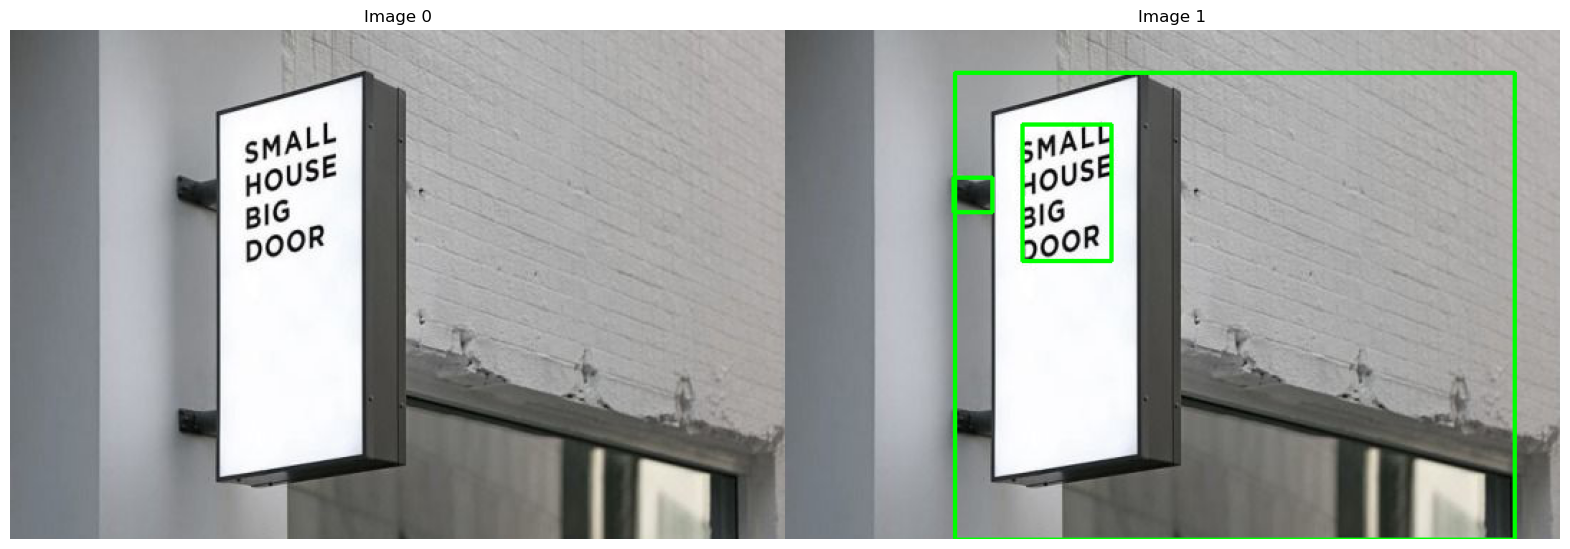

In [28]:
FindDF = LabelDF[LabelDF["area"] > 120]
display(FindDF)

result = image_7.copy()

for idx in FindDF.index:
    x = int(FindDF.loc[idx, "minc"])
    y = int(FindDF.loc[idx, "minr"])
    w = int(FindDF.loc[idx, "width"])
    h = int(FindDF.loc[idx, "height"])
    cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),2)

ShowImage([image_7, result], 1, 2)

# 4/ Chụp 1 dòng chat của bạn và sau đó dùng Morphology để trích các dòng chat đó ra

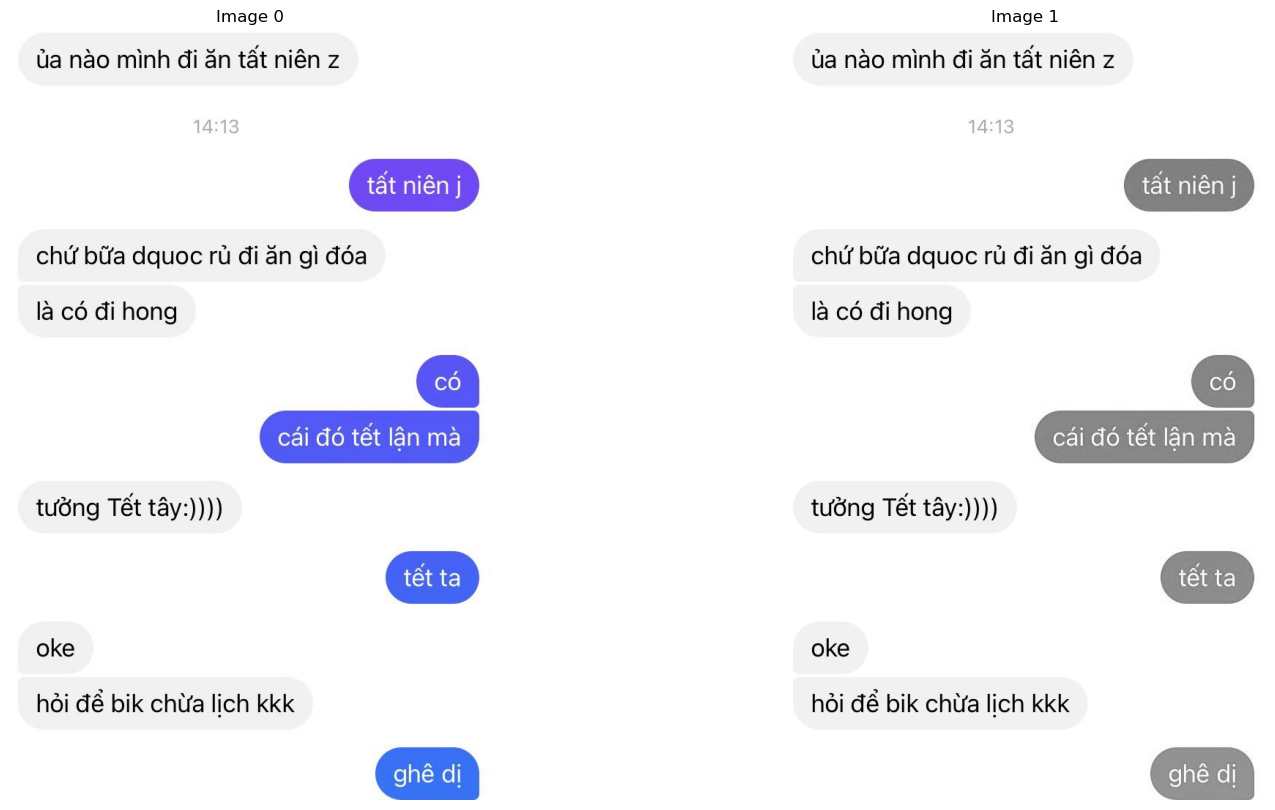

In [29]:
image_8 = imread('Chat.jpg')
image_gray_8 = cv2.cvtColor(image_8, cv2.COLOR_BGR2GRAY)
ShowImage([image_8, image_gray_8],1,2)

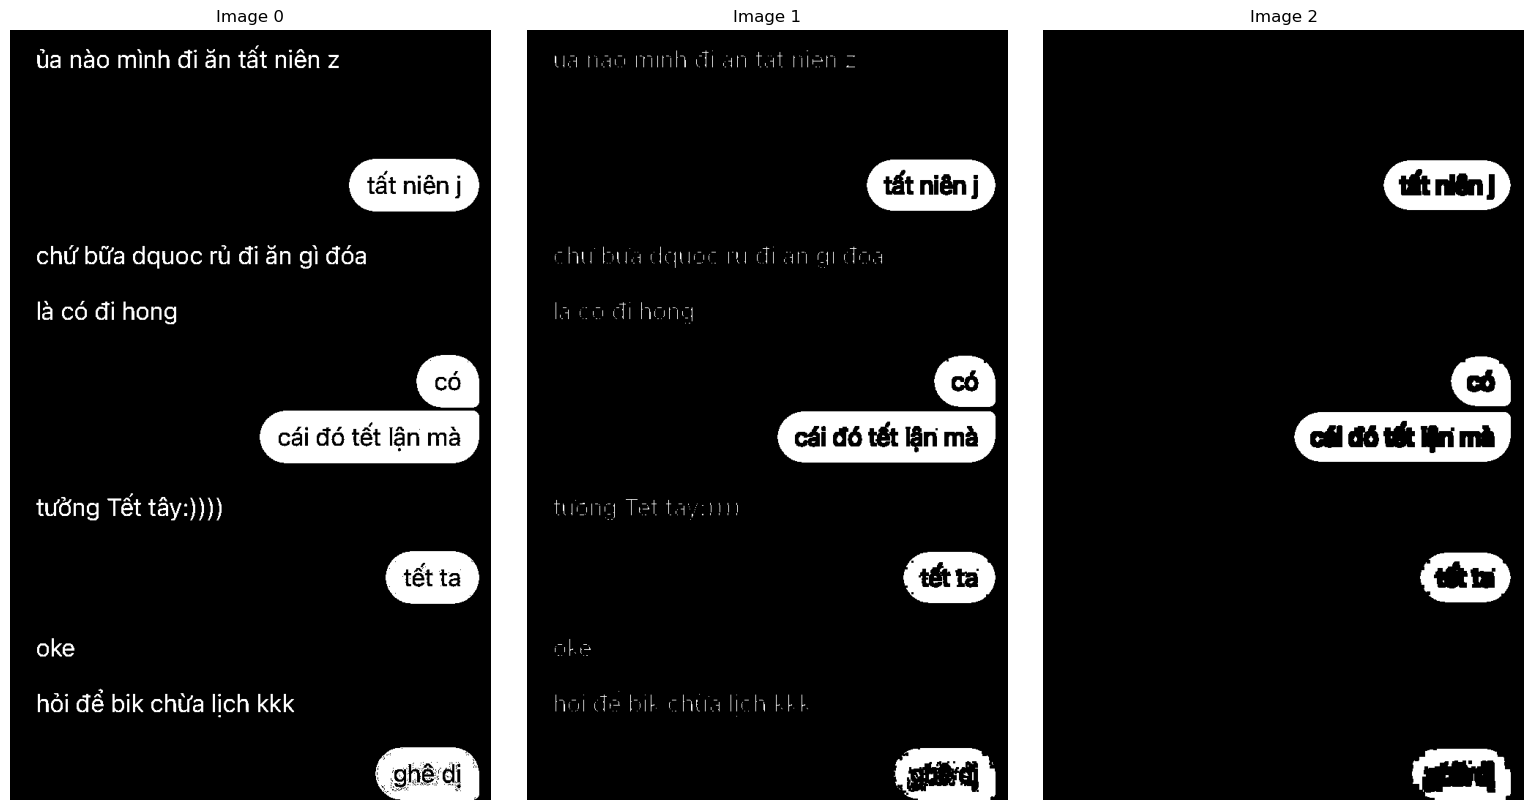

In [30]:
thresh, image_mask = cv2.threshold(image_gray_8,150,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((3,3),np.uint8)
image_erosion01 = cv2.erode(image_mask,kernel,iterations = 1)
image_erosion02 = cv2.erode(image_mask,kernel,iterations = 2)


ShowImage([image_mask, image_erosion01, image_erosion02], 1, 3)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


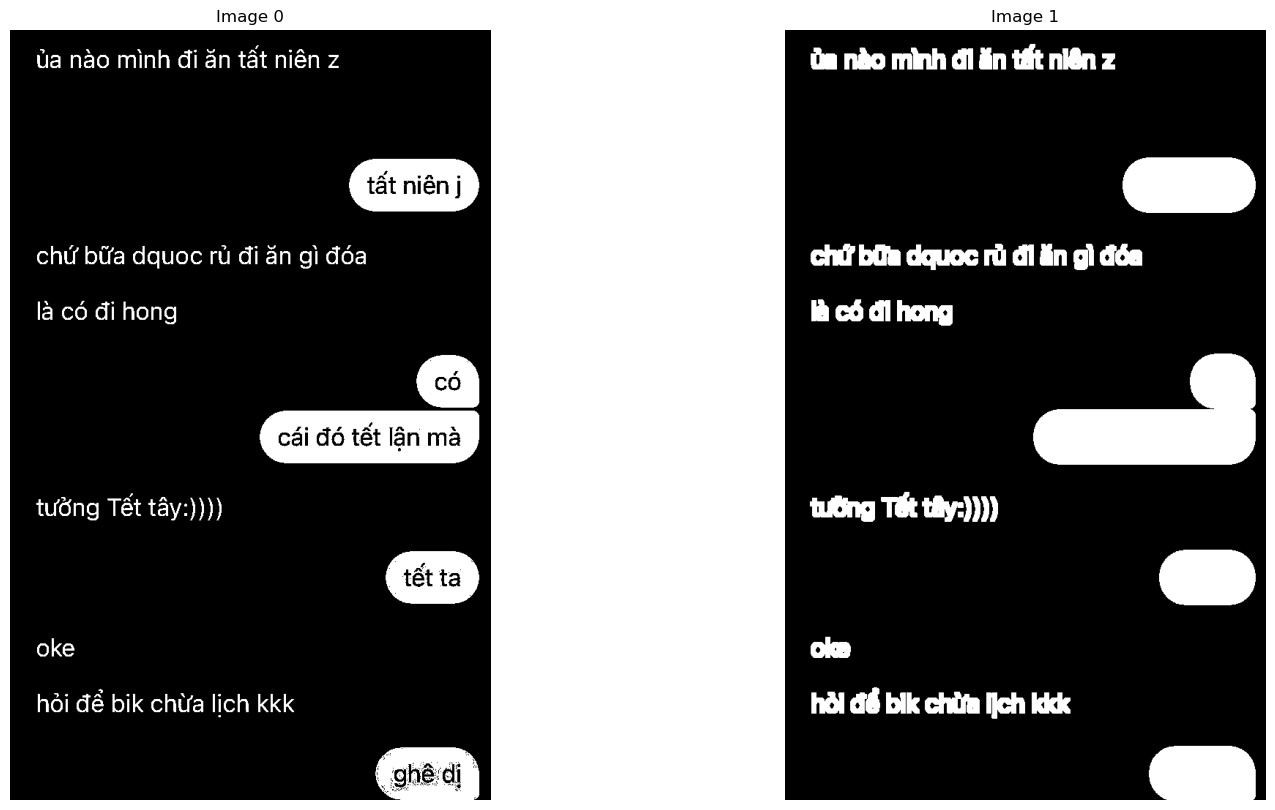

In [31]:
image_mask01 = image_mask.copy()

kernel = np.ones((3,3),np.uint8)
print(kernel)
image_dilated = cv2.dilate(image_mask01, kernel, iterations = 2)
ShowImage([image_mask01, image_dilated], 1, 2)

In [32]:
import pandas as pd
from skimage.measure import label, regionprops

image_label = label(image_dilated) # Label each area in the image from 1 to n
print("index of each region from 1 to ", image_label.max())

regions = regionprops(image_label, intensity_image=image_gray_8)
ColList = ["label", "at_row", "at_col",
          "area", "minr", "minc", "maxr", "maxc", "width", "height",
           "max_intensity", "mean_intensity", "min_intensity",]

LabelDF = pd.DataFrame(columns = ColList)
for props in regions:
    RowList = []
    label = props.label
    if("label" in ColList):
        RowList.append(label)

    at_row, at_col = props.centroid
    if("at_row" in ColList):
        RowList.append(at_row)

    if("at_col" in ColList):
        RowList.append(at_col)

    if("area" in ColList):
        RowList.append(props.area)

    minr, minc, maxr, maxc = props.bbox
    if("minr" in ColList):
        RowList.append(minr)

    if("minc" in ColList):
        RowList.append(minc)

    if("maxr" in ColList):
        RowList.append(maxr)

    if("maxc" in ColList):
        RowList.append(maxc)

    if("width" in ColList):
        RowList.append(maxc - minc)

    if("height" in ColList):
        RowList.append(maxr - minr)

    if("max_intensity" in ColList):
        RowList.append(props.max_intensity)

    if("mean_intensity" in ColList):
        RowList.append(props.mean_intensity)

    if("min_intensity" in ColList):
        RowList.append(props.min_intensity)

    LabelDF.loc[label-1, 0 : len(RowList)] = RowList
display(LabelDF)

index of each region from 1 to  44


C:\Users\PC\AppData\Local\Temp\ipykernel_3068\2155082930.py:57: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  LabelDF.loc[label-1, 0 : len(RowList)] = RowList
C:\Users\PC\AppData\Local\Temp\ipykernel_3068\2155082930.py:57: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  LabelDF.loc[label-1, 0 : len(RowList)] = RowList
C:\Users\PC\AppData\Local\Temp\ipykernel_3068\2155082930.py:57: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  LabelDF.loc[label-1, 0 : len(RowList)] = RowList
C:\Users\PC\AppData\Local\Temp\ipykernel_3068\2155082930.py:57: FutureWarning: Slicing a positional slice with .loc is not supported, and will

label       at_row      at_col     area minr minc  maxr maxc width height  \
0      1    38.906433  331.486355   1026.0   19  310    54  353    43     35   
1      2    41.191781   52.249066    803.0   24   35    54   71    36     30   
2      3    41.579965  108.262742   1138.0   24   81    54  137    56     30   
3      4    40.421162  195.255187    964.0   24  172    54  220    48     30   
4      5    39.323711  273.802062    485.0   24  265    54  283    18     30   
5      6    40.126326  399.459981   1037.0   24  379    54  425    46     30   
6      7    39.670588  243.101471    680.0   25  228    54  257    29     29   
7      8    41.838207   159.31384    513.0   32  146    54  174    28     22   
8      9    41.991018  292.377246    334.0   32  284    54  302    18     22   
9     10    41.991018  369.377246    334.0   32  361    54  379    18     22   
10    11    42.522523   441.54955    333.0   32  433    54  451    18     22   
11    12   211.501146  551.506992  12657.0  174  461   250  643   182     76   
12    13   308.422003   65.312808   1218.0  292   35   322   96    61     30   
13    14   308.348875  287.327974    622.0  292  272   322  302    30     30   
14    15   307.308642  356.790123    486.0  292  348   322  366    18     30   
15    16   311.022039    407.9573    726.0  292  394   328  422    28     36   
16    17   308.743349   458.50626   1278.0  292  430   322  488    58     30   
17    18   308.563315  128.683807   1303.0  293  101   322  158    57     29   
18    19   310.525026  212.672054   1918.0  293  166   328  264    98     35   
19    20   307.640762  326.068915    682.0  293  311   322  340    29     29   
20    21   309.991018  375.377246    334.0  300  367   322  385    18     22   
21    22   383.953895    46.90461    629.0  368   36   398   60    24     30   
22    23   385.137022   88.586298    759.0  368   69   398  107    38     30   
23    24   383.655882  130.110294    680.0  369  115   398  144    29     29   
24    25   386.797484  191.715094   1590.0  369  153   404  229    76     35   
25    26   539.456855   514.87803  28138.0  442  339   594  643   304    152   
26    27   649.892463  158.214154   1088.0  631  131   666  181    50     35   
27    28   653.798057   79.699387   1956.0  636   34   672  123    89     36   
28    29   652.884183   212.22299   1157.0  636  187   672  244    57     36   
29    30   653.971014  249.322464    276.0  637  244   672  255    11     35   
30    31   653.971014  261.322464    276.0  637  256   672  267    11     35   
31    32   653.971014  273.322464    276.0  637  268   672  279    11     35   
32    33   653.971014  285.322464    276.0  637  280   672  291    11     35   
33    34        661.5       239.5     64.0  658  236   666  244     8      8   
34    35   747.488756   576.52537   8849.0  710  511   786  643   132     76   
35    36   845.838509   62.296362   1127.0  829   35   858   90    55     29   
36    37   918.582046  110.650579   1036.0  898   89   934  130    41     36   
37    38   919.784276   58.834132   1043.0  904   36   934   81    45     30   
38    39   921.001263  229.301136   1584.0  904  191   934  266    75     30   
39    40   920.161742  151.065319    643.0  905  138   934  165    27     29   
40    41   920.655696  173.227848    395.0  905  166   934  184    18     29   
41    42    921.19834       298.6   1205.0  905  275   941  328    53     36   
42    43   920.639456  361.643707   1176.0  905  337   934  390    53     29   
43    44  1015.506881  571.069211   9955.0  978  497  1052  643   146     74   

   max_intensity mean_intensity min_intensity  
0          255.0     157.636452           0.0  
1          255.0     158.084682           0.0  
2          255.0     154.543937           0.0  
3          255.0      158.34751           0.0  
4          255.0     157.090722           0.0  
5          255.0     158.082932           0.0  
6          255.0     153.769118           0.0  
7          255.0  

label       at_row      at_col     area minr minc  maxr maxc width height  \
0      1    38.906433  331.486355   1026.0   19  310    54  353    43     35   
1      2    41.191781   52.249066    803.0   24   35    54   71    36     30   
2      3    41.579965  108.262742   1138.0   24   81    54  137    56     30   
3      4    40.421162  195.255187    964.0   24  172    54  220    48     30   
4      5    39.323711  273.802062    485.0   24  265    54  283    18     30   
5      6    40.126326  399.459981   1037.0   24  379    54  425    46     30   
6      7    39.670588  243.101471    680.0   25  228    54  257    29     29   
7      8    41.838207   159.31384    513.0   32  146    54  174    28     22   
8      9    41.991018  292.377246    334.0   32  284    54  302    18     22   
9     10    41.991018  369.377246    334.0   32  361    54  379    18     22   
10    11    42.522523   441.54955    333.0   32  433    54  451    18     22   
11    12   211.501146  551.506992  12657.0  174  461   250  643   182     76   
12    13   308.422003   65.312808   1218.0  292   35   322   96    61     30   
13    14   308.348875  287.327974    622.0  292  272   322  302    30     30   
14    15   307.308642  356.790123    486.0  292  348   322  366    18     30   
15    16   311.022039    407.9573    726.0  292  394   328  422    28     36   
16    17   308.743349   458.50626   1278.0  292  430   322  488    58     30   
17    18   308.563315  128.683807   1303.0  293  101   322  158    57     29   
18    19   310.525026  212.672054   1918.0  293  166   328  264    98     35   
19    20   307.640762  326.068915    682.0  293  311   322  340    29     29   
20    21   309.991018  375.377246    334.0  300  367   322  385    18     22   
21    22   383.953895    46.90461    629.0  368   36   398   60    24     30   
22    23   385.137022   88.586298    759.0  368   69   398  107    38     30   
23    24   383.655882  130.110294    680.0  369  115   398  144    29     29   
24    25   386.797484  191.715094   1590.0  369  153   404  229    76     35   
25    26   539.456855   514.87803  28138.0  442  339   594  643   304    152   
26    27   649.892463  158.214154   1088.0  631  131   666  181    50     35   
27    28   653.798057   79.699387   1956.0  636   34   672  123    89     36   
28    29   652.884183   212.22299   1157.0  636  187   672  244    57     36   
29    30   653.971014  249.322464    276.0  637  244   672  255    11     35   
30    31   653.971014  261.322464    276.0  637  256   672  267    11     35   
31    32   653.971014  273.322464    276.0  637  268   672  279    11     35   
32    33   653.971014  285.322464    276.0  637  280   672  291    11     35   
33    34        661.5       239.5     64.0  658  236   666  244     8      8   
34    35   747.488756   576.52537   8849.0  710  511   786  643   132     76   
35    36   845.838509   62.296362   1127.0  829   35   858   90    55     29   
36    37   918.582046  110.650579   1036.0  898   89   934  130    41     36   
37    38   919.784276   58.834132   1043.0  904   36   934   81    45     30   
38    39   921.001263  229.301136   1584.0  904  191   934  266    75     30   
39    40   920.161742  151.065319    643.0  905  138   934  165    27     29   
40    41   920.655696  173.227848    395.0  905  166   934  184    18     29   
41    42    921.19834       298.6   1205.0  905  275   941  328    53     36   
42    43   920.639456  361.643707   1176.0  905  337   934  390    53     29   
43    44  1015.506881  571.069211   9955.0  978  497  1052  643   146     74   

   max_intensity mean_intensity min_intensity  
0          255.0     157.636452           0.0  
1          255.0     158.084682           0.0  
2          255.0     154.543937           0.0  
3          255.0      158.34751           0.0  
4          255.0     157.090722           0.0  
5          255.0     158.082932           0.0  
6          255.0     153.769118           0.0  
7          255.0  

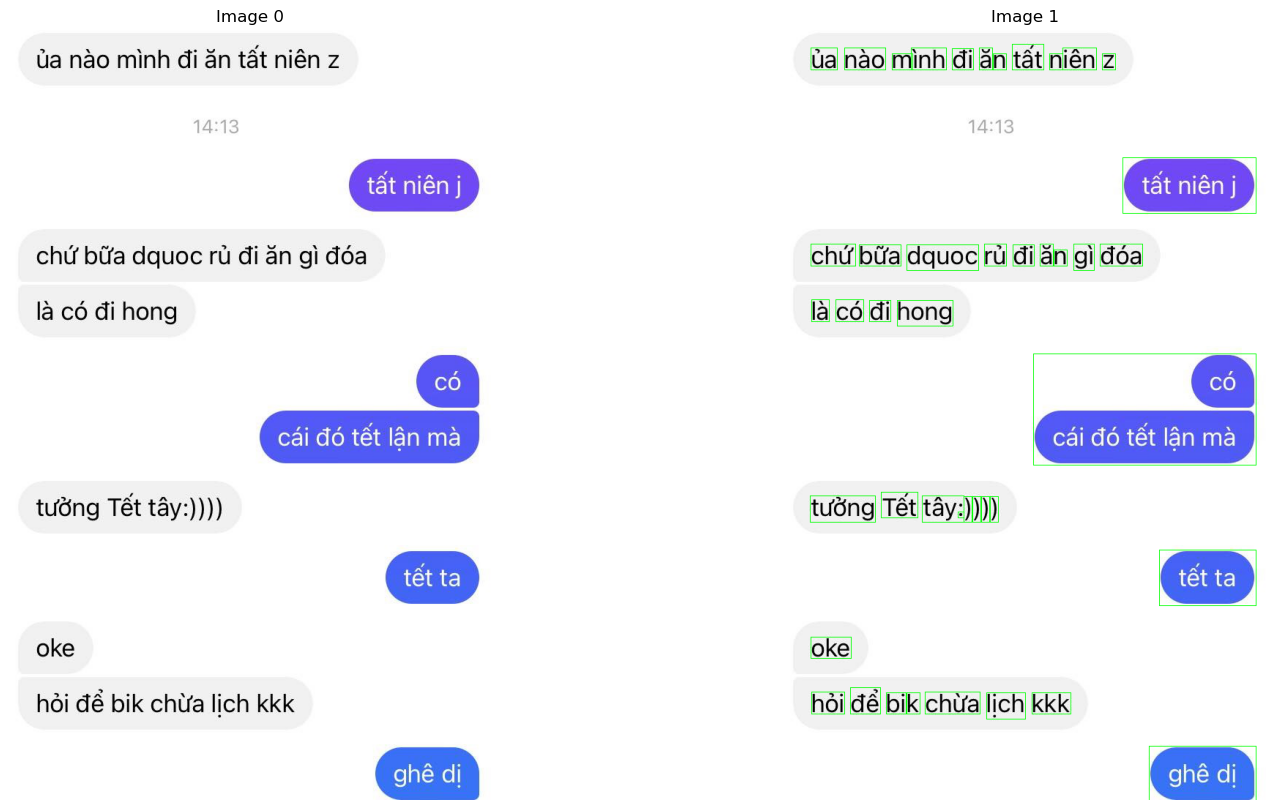

In [33]:
FindDF = LabelDF[LabelDF["area"] > 50]
display(FindDF)

result = image_8.copy()

for idx in FindDF.index:
    x = int(FindDF.loc[idx, "minc"])
    y = int(FindDF.loc[idx, "minr"])
    w = int(FindDF.loc[idx, "width"])
    h = int(FindDF.loc[idx, "height"])
    cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),1)

ShowImage([image_8, result], 1, 2)